# Internship project: Modeling and forecasting the evolution of encryption technologies using Open Alex (CYD)

PROJECT DESCRIPTION

The goal of this jupyter notebook is to explore the datasets I created, to prepare them for in-depth analysis and draw meaningful insights from them. This will be very useful to understand how to create my proximity indices and to write my paper later. More specifically this data exploration will be divided in 6 parts: 

1) The full data\
2) The citation data\
3) The concepts data\
4) The keywords data\
5) The h-indices data\
6) Correlation analysis

In [1]:
%%html
<marquee style='width: 30%; color: blue;'><b>Let us start data exploration!</b></marquee>

Because of memory issues, I splitted the analysis of each variable in several jupyter notebooks. This notebook is about the full data.

IMPORTING LIBRARIES

Before we get started, let's import all necessary libraries for performing our data analysis:

In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from scipy import stats
import re
import nltk
import missingno as msno
from tqdm import tqdm
import json
import statistics
import math

nltk.download("stopwords", quiet=True)
from nltk.corpus import stopwords
from gensim.models import Phrases
from collections import Counter

# enabling Jupyter Lab to include the output of our plots directly in this notebook
%matplotlib inline


# used to avoid blurry output plots in Jupyter Notebooks
%config InLineBackend.figure_format = "retina"

pd.options.mode.chained_assignment = None

__Download of the data__

In [3]:
infile_df_full = open('../creation_data_and_variables/data_creation_variables/df_full','rb')
df_full = pickle.load(infile_df_full)
infile_df_full.close()

# I keep only the values that will be necessary for my analysis 
#(I deleted the values month and year)
df_full= df_full[['id','title','publication_date','author','referenced_works','abstract','concepts','score_concepts']]

# **Part 1 -- The full data**

THE DATASET

The dataset for this internship project was created collecting data from Open Alex, an open database of bibliometric information about the academic and scientific production of papers. In this dataset only the papers published from the first of January 2012 to the 31st of December 2022 are taken into consideration.

More specifically, the dataset contains the following information for each paper:
- ```id```: the URL link of the internet page for each paper created by OpenAlex. All information about the paper are given on this internet page.
- ```title```: title of the paper
- ```publication_date```: the date of publication of the paper
- ```author```: it gives in each row one author who contributed to the realization of the paper 
- ```referenced_works```: this gives the works cited by the paper in question, and more   specifically, the url link of the internet page for these papers as it is given by OpenAlex
- ```abstract```: abstract of the paper
- ```concepts```: the concepts of my list of encryption technologies that I want to analyze. This allows us to see what is the attribution of this paper to this concept, considering the variable 'score_concepts'.
- ```score_concepts```: score of attribution between 0 and 1 of a paper to the concept given in the in the variable 'concepts'.

__The encryption technologies studied in this work__

The concepts analyzed in this research are the following: \
'Authentication protocol', \
'Biometrics', \
'Blockchain', \
'Differential Privacy', \
'Digital rights management',\
'Digital signature', \
'Disk Encryption', \
'Distributed algorithm', \
'Electronic voting', \
'Functional encryption',\
'Hardware acceleration', \
'Hardware security module', \
'Hash function', \
'Homomorphic encryption',\
'Identity management', \
'Key management', \
'Link encryption', \
'Post-quantum cryptography', \
'Public-key cryptography',\
'Quantum key distribution', \
'Quantum cryptography', \
'Random number generation', \
'Symmetric-key algorithm',\
'Threshold cryptosystem', \
'Trusted Computing', \
'Tunneling protocol', \
'Zero-knowledge proof'

In [4]:
df_full

,id,title,publication_date,author,referenced_works,abstract,concepts,score_concepts
0,https://openalex.org/W1635413415,The Kerberos Network Authentication Service (V5),2005-07-01,https://openalex.org/A2974782682,NaN,This document gives an overview and specifica...,Authentication protocole,0.4739076
0,https://openalex.org/W1635413415,The Kerberos Network Authentication Service (V5),2005-07-01,https://openalex.org/A2974782682,NaN,This document gives an overview and specifica...,Biometrics,0
0,https://openalex.org/W1635413415,The Kerberos Network Authentication Service (V5),2005-07-01,https://openalex.org/A2974782682,NaN,This document gives an overview and specifica...,Blockchain,0
0,https://openalex.org/W1635413415,The Kerberos Network Authentication Service (V5),2005-07-01,https://openalex.org/A2974782682,NaN,This document gives an overview and specifica...,Differential Privacy,0
0,https://openalex.org/W1635413415,The Kerberos Network Authentication Service (V5),2005-07-01,https://openalex.org/A2974782682,NaN,This document gives an overview and specifica...,Digital rights management,0
...,...,...,...,...,...,...,...,...
288700,https://openalex.org/W98729159,Zero-knowledge against quantum attacks (Prelim...,2005-01-01,https://openalex.org/A2984226480,https://openalex.org/W2120279343,This paperprovesthat several interactiveproof...,Symmetric-key algorithm,0
288700,https://openalex.org/W98729159,Zero-knowledge against quantum attacks (Prelim...,2005-01-01,https://openalex.org/A2984226480,https://openalex.org/W2120279343,This paperprovesthat several interactiveproof...,Threshold cryptosystem,0
288700,https://openalex.org/W98729159,Zero-knowledge against quantum attacks (Prelim...,2005-01-01,https://openalex.org/A2984226480,https://openalex.org/W2120279343,This paperprovesthat several interactiveproof...,Trusted Computing,0
288700,https://openalex.org/W98729159,Zero-knowledge against quantum attacks (Prelim...,2005-01-01,https://openalex.org/A2984226480,https://openalex.org/W2120279343,This paperprovesthat several interactiveproof...,Tunneling protocol,0


<div class="alert-info">
1. We check the number of rows and columns.
</div>

_NB: this action is not really necessary, as the number of columns and rows are already indicated below the above table (when calling the dataframe). However, for a cleaner procedure, we can write the following snippet:_

In [5]:
df_full.shape

(111909303, 8)

We note that we have the same output as [5]. All good then!

<div class="alert-info">
2. Display a few entries from the DataFrame.
</div>

In [6]:
df_full.head()

,id,title,publication_date,author,referenced_works,abstract,concepts,score_concepts
0,https://openalex.org/W1635413415,The Kerberos Network Authentication Service (V5),2005-07-01,https://openalex.org/A2974782682,NaN,This document gives an overview and specifica...,Authentication protocole,0.4739076
0,https://openalex.org/W1635413415,The Kerberos Network Authentication Service (V5),2005-07-01,https://openalex.org/A2974782682,NaN,This document gives an overview and specifica...,Biometrics,0
0,https://openalex.org/W1635413415,The Kerberos Network Authentication Service (V5),2005-07-01,https://openalex.org/A2974782682,NaN,This document gives an overview and specifica...,Blockchain,0
0,https://openalex.org/W1635413415,The Kerberos Network Authentication Service (V5),2005-07-01,https://openalex.org/A2974782682,NaN,This document gives an overview and specifica...,Differential Privacy,0
0,https://openalex.org/W1635413415,The Kerberos Network Authentication Service (V5),2005-07-01,https://openalex.org/A2974782682,NaN,This document gives an overview and specifica...,Digital rights management,0


<div class="alert-info">
3. We check the data type for each column.
</div>

__We can do that by running the following snippet:__

In [7]:
df_full.dtypes

id                  object
title               object
publication_date    object
author              object
referenced_works    object
abstract            object
concepts            object
score_concepts      object
dtype: object

We see that the type of all our variables is 'object'. A deeper analysis of the types of variables does not seem necessary in our case, since the type is the same for all the variables.

_Now that we have a first overview of the dataset, our goal is to get familiar with its strengths and weaknesses and prepare it for the in-depth analysis we will perform in the following tasks._

We start by analysing: (A) the duplicates, and then (B) the missing values that we have in the data.

<div class="alert-info">
4. Checking the duplicates
</div>



In [8]:
df_full.duplicated()

0         False
0         False
0         False
0         False
0         False
          ...  
288700    False
288700    False
288700    False
288700    False
288700    False
Length: 111909303, dtype: bool

We see that we do not have duplicates as far as we can see.
Nevertheless, we want to see the length of our dataset without duplicates to be really sure.

In [9]:
length_df_full = len(df_full)
length_df_full_nodup = len(df_full.drop_duplicates())
print('The number of duplicates is: '+str(length_df_full - length_df_full_nodup))
print('There are ' +str(100*(length_df_full - length_df_full_nodup)/length_df_full)+' % of duplicates in my dataset')

The number of duplicates is: 136944
There are 0.12237052356585583 % of duplicates in my dataset


We visualize with a pie chart the proportion of duplicates in the dataset ```df_full```.

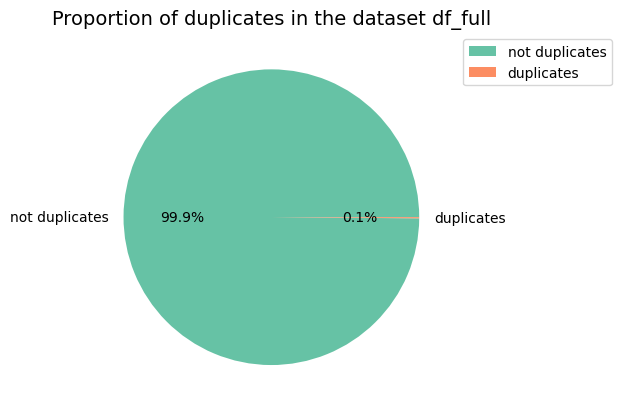

In [10]:
# data to be displayed
data = [length_df_full_nodup, length_df_full - length_df_full_nodup]

# labels for radability and intepretation
labels = ["not duplicates", "duplicates"]

# colors
colors = sns.color_palette("Set2")

# creating the pie chart
plt.pie(data, labels=labels, colors=colors, autopct="%0.1f%%")

# title
plt.title(
    "Proportion of duplicates in the dataset df_full",
    color="black",  # I am using the 'white' color here, as I am using the 'dark mode' of Jupyter Lab.
    fontsize=14,
)

# legend
plt.legend(bbox_to_anchor=(1, 1))

# calling the pie chart
plt.show()


For some reason there are few duplicates in my dataset. I decide to cancel them from my dataset for the future. In any case, there almost no duplicates, which is what I wanted.

In [11]:
df_full = df_full.drop_duplicates()

<div class="alert-info">
5. We show the proportion of missing values in the data using (i) appropriate visualizations, and (ii) numerical summaries.
</div>

Then, more interestingly, missing values in samples (rows) and feautures (columns) can be visually investigated by using the ```missingno``` library:

We can keep in mind that only the variables ```referenced works``` and ```abstract``` can be empty. It is NaN for ```referenced_works``` and '--' for ```abstract```. All the other variables are not empty. In fact, I chose only the papers that had a title, at least an author, a publication date, and an id, since I could not have handled papers without these vital informations. ```Concepts``` and ```score_concepts``` are automatically given by the algorithms of Open Alex. Nevertheless, a score of attribution is not attributed to every concept of my list of concepts for every paper. I completed the dataset giving zero score of attribution to the missing concepts for each paper.

I now replace the abstract with '--' by NaN such that we can visualize it later.

In [12]:
df_full['abstract'] = df_full['abstract'].replace(to_replace='--', value=np.nan)

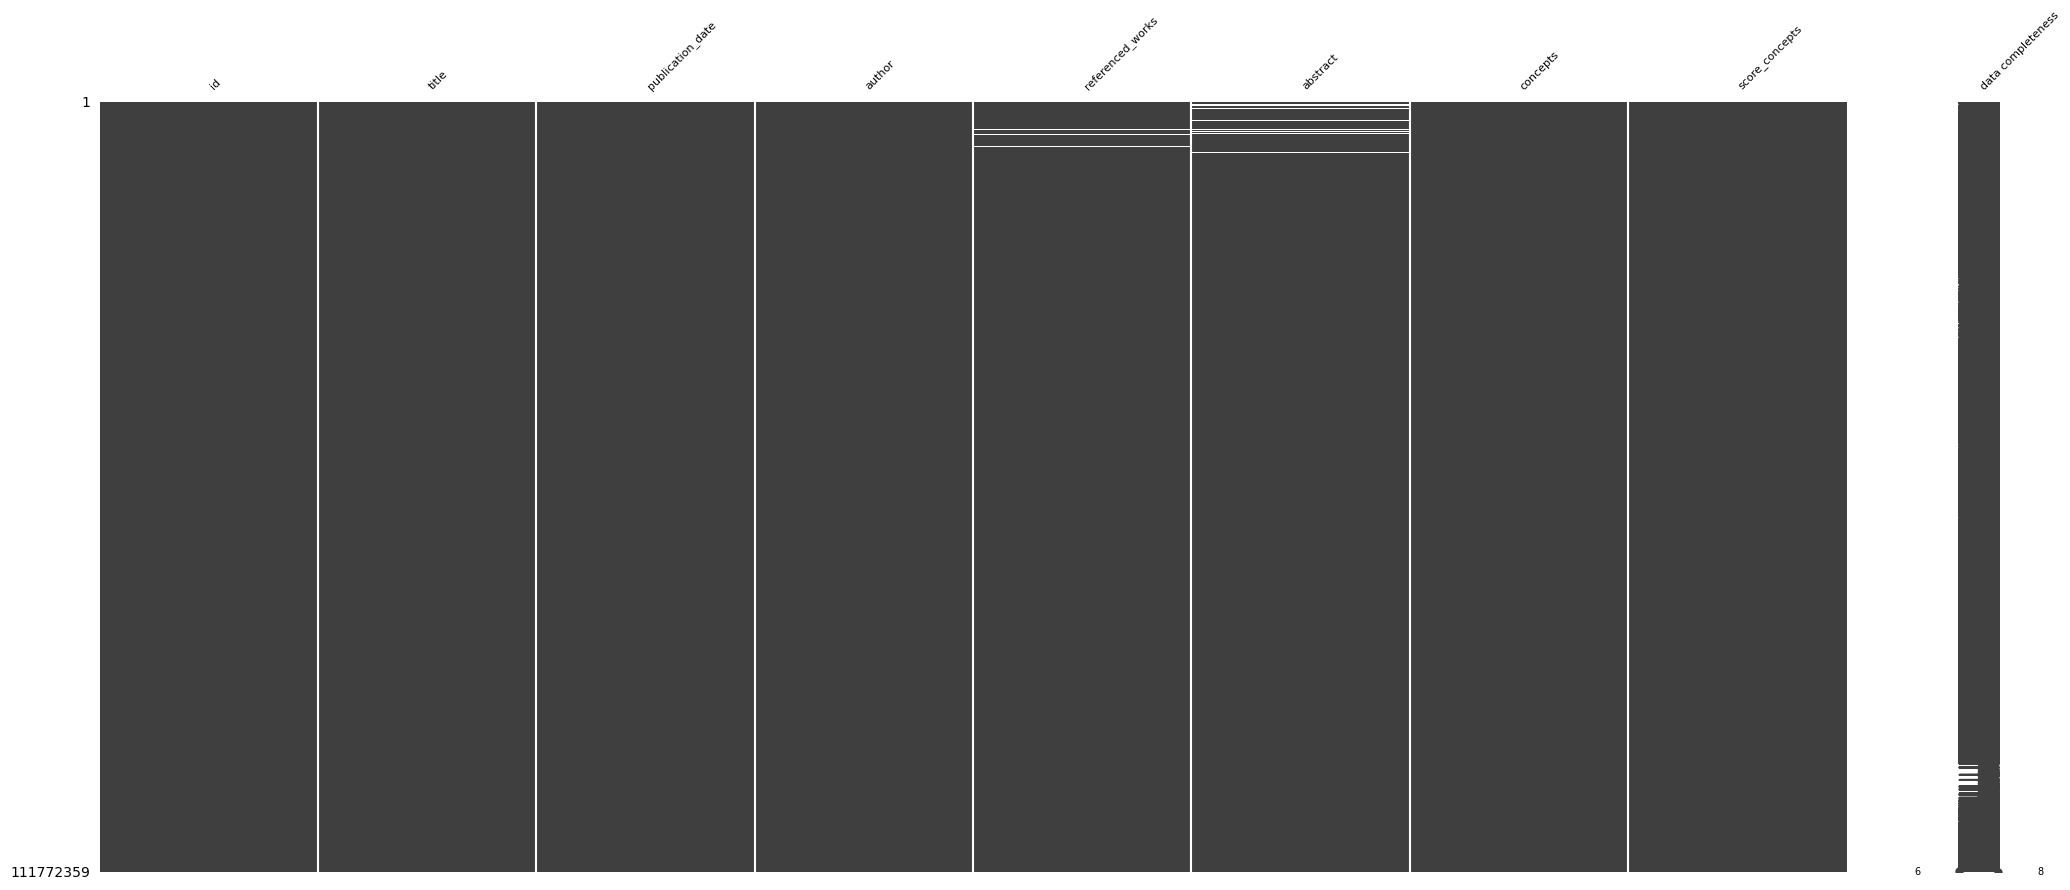

In [13]:
msno.matrix(df_full, labels=True, fontsize=8)
plt.show()

__Observations__

In the x-axis we can see the 8 unique features (columns), and on the y-axis the 67'039'785 individual samples (rows). 

In this particular dataset (```df_noduplicates```), there are almost no missing values. As said above, by purpose, only ```abstract``` and ```referenced_works``` can have missing data. We see that there is a very low percentage of missing data among these variables. We will now analyze this below in more detailed manner.

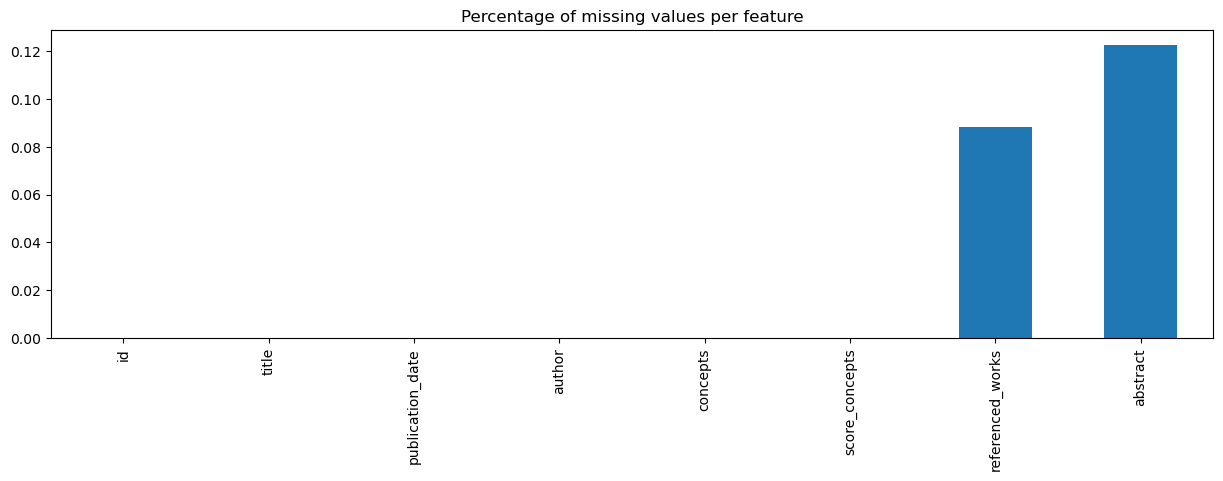

In [14]:
df_full.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4), title="Percentage of missing values per feature"
)
plt.show()

__Observations__

We see that the percentage of missing values for ```abstract``` and ```referenced_works``` is low. Nonetheless, these numbers do not make much sense, since for every paper with no referenced works, the paper appears only once, while for the papers with referenced works, the paper appears as many times as referenced works. 

For this reason, we now do a visualization of the papers and not of the rows of the data frame as done above. We show the percentage of missing values.

In [15]:
listofpapers = list(set(df_full.id.tolist()))
numberpapers = len(listofpapers)

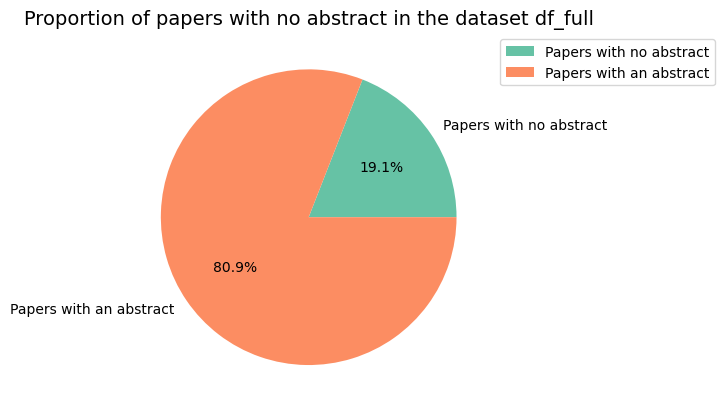

In [16]:
# data to be displayed
df_full_noabstract = df_full.loc[df_full.abstract.isnull()]
numberpapers_noabstract = len(list(set(df_full_noabstract.id.tolist())))

data = [numberpapers_noabstract, numberpapers - numberpapers_noabstract]

# labels for radability and intepretation
labels = ["Papers with no abstract", "Papers with an abstract"]

# colors
colors = sns.color_palette("Set2")

# creating the pie chart
plt.pie(data, labels=labels, colors=colors, autopct="%0.1f%%")

# title
plt.title(
    "Proportion of papers with no abstract in the dataset df_full",
    color="black",  # I am using the 'white' color here, as I am using the 'dark mode' of Jupyter Lab.
    fontsize=14,
)

# legend
plt.legend(bbox_to_anchor=(1, 1))

# calling the pie chart
plt.show()

In [17]:
df_ref_NaN = df_full.loc[df_full.abstract.isnull()].copy()
a= len(list(set(df_ref_NaN.id.tolist())))
b= len(list(set(df_full.id.tolist())))
print('There are '+str(b)+' of papers in my database.')
print('There are '+str(b-a)+' papers with abstracts in my database.')

There are 288701 of papers in my database.
There are 233649 papers with abstracts in my database.


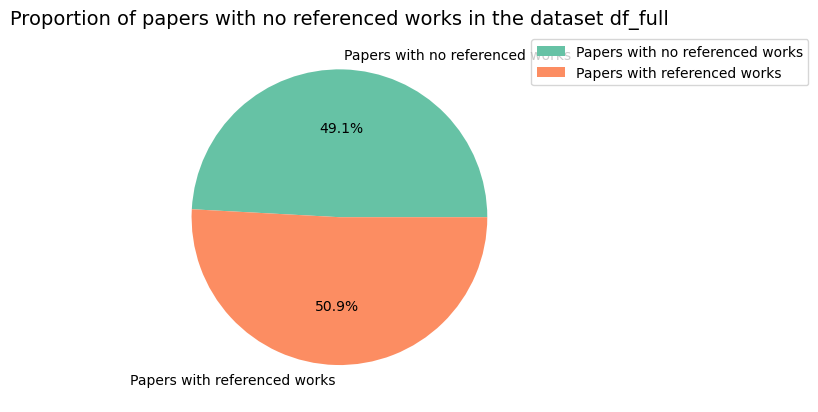

In [18]:
# data to be displayed
df_full_noref = df_full.loc[df_full.referenced_works.isnull()]
numberpapers_noref = len(list(set(df_full_noref.id.tolist())))

data = [numberpapers_noref, numberpapers - numberpapers_noref]

# labels for radability and intepretation
labels = ["Papers with no referenced works", "Papers with referenced works"]

# colors
colors = sns.color_palette("Set2")

# creating the pie chart
plt.pie(data, labels=labels, colors=colors, autopct="%0.1f%%")

# title
plt.title(
    "Proportion of papers with no referenced works in the dataset df_full",
    color="black",  # I am using the 'white' color here, as I am using the 'dark mode' of Jupyter Lab.
    fontsize=14,
)

# legend
plt.legend(bbox_to_anchor=(1, 1))

# calling the pie chart
plt.show()

In [19]:
df_ref_NaN = df_full.loc[df_full.referenced_works.isnull()].copy()
a= len(list(set(df_ref_NaN.id.tolist())))
b= len(list(set(df_full.id.tolist())))
print('There are '+str(b)+' of papers in my database')
print('There are '+str(b-a)+' papers with referenced works in my database')

There are 288701 of papers in my database
There are 146824 papers with referenced works in my database


__Observations__

Regarding the abstracts, we saw that almost 20% of the papers do not have an abstract. To adress this issue, we computed the keywords using only the titles of the papers that did not have an abstract. This is not too much of a problem since most of the keywords are already present in the title of the papers.

Regarding the referenced works, 50% of the papers do not have referenced works. This is a very big percentage. The problem is that the computation of the h-index is based on the number of citations of each paper. So two of my indicators, the number of authors and the number of citations in common between two technologies, is based on this variable. Therefore, all these papers are of no use for me. There is another variable given by Open Alex, which is called ```cited_by_api_url```. It basically gives all the papers that cite the papers I am considering. Nevertheless, this variable is computed using the variable ```referenced_works```. So I would not gain any new information using ```cited_by_api_url``` instead of ```referenced_works```.
For this reason, I will drop all the papers with no referenced works and I will not consider for my studies anymore. In any case, I would already have a lot of papers (88691) which already give a lot of insights about the evolution of encryption technologies.

We now want to see how the missing values between ```referenced_works``` and ```abstract``` are correlated. To do that we do a pie chart, that shows:
1) Number of papers with no abstract and no referenced works\
2) Number of papers only with no abstract\
3) Number of papers only with no referenced works\
4) Number of papers with abstract and with referenced works

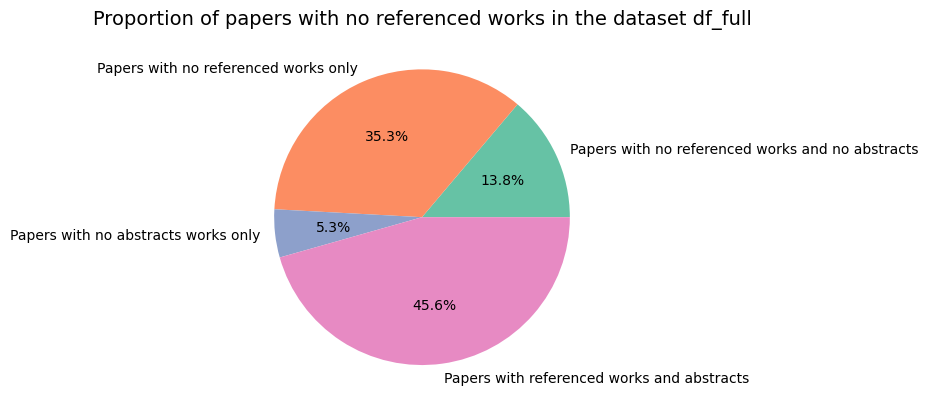

In [20]:
# data to be displayed
df_full_noref = df_full.loc[df_full.referenced_works.isnull()]
df_full_noabstract = df_full.loc[df_full.abstract.isnull()]
df_full_noabstract_noref = df_full_noref.loc[df_full_noref.abstract.isnull()]

number_noref_noabstract = len(list(set(df_full_noabstract_noref.id.tolist())))
number_just_noref = len(list(set(df_full_noref.id.tolist())))-\
                    len(list(set(df_full_noabstract_noref.id.tolist())))
number_just_noabstract = len(list(set(df_full_noabstract.id.tolist())))-\
                    len(list(set(df_full_noabstract_noref.id.tolist())))
number_withabstract_withref = len(list(set(df_full.id.tolist())))-number_just_noabstract-\
                            number_just_noref-number_noref_noabstract

data = [number_noref_noabstract, number_just_noref ,number_just_noabstract,number_withabstract_withref]

# labels for radability and intepretation
labels = ["Papers with no referenced works and no abstracts", "Papers with no referenced works only",
         "Papers with no abstracts works only","Papers with referenced works and abstracts"]

# colors
colors = sns.color_palette("Set2")

# creating the pie chart
plt.pie(data, labels=labels, colors=colors, autopct="%0.1f%%")



# title
plt.title(
    "Proportion of papers with no referenced works in the dataset df_full",
    color="black",  # I am using the 'white' color here, as I am using the 'dark mode' of Jupyter Lab.
    fontsize=14,
)

# legend
#plt.legend(bbox_to_anchor=(1, 1))

# calling the pie chart
plt.show()

__Observations__

Without any surprise, we see that most of the papers with no abstract also do not have referenced works. This is probably due to the fact that papers with missing information somewhere, tend to have missing information everywhere. The papers that can not be of any use to our studies are the ones with no referenced works and with no referenced works and no abstracts. The papers with no abstracts only represent only 5% out of 45% so approximatively 11% of the papers I will really use in my studies.

In my studies I will use the blue and pink parts of the pie chart.

As a last analysis, we want to investigate how the missing information are distributed over the technologies, and if we are creating a strong bias eliminating all the papers without these information.

What we do, is that we take for each technology all the papers with non-zero score of attribution to this technology and consider how many papers attributed to this technology have missing information.

In [21]:
listconcepts = list(set(df_full.concepts.tolist()))

list_numberpapers_noref=[]
list_numberpapers_ref=[]

for concept in tqdm(listconcepts):
    df_intermed = df_full.loc[df_full['concepts']==concept].copy()
    df_concept = df_intermed.loc[df_intermed['score_concepts']!=0].copy()
    number_papers_concept = len(list(set(df_concept.id.tolist())))
    df_concept_noref = df_concept.loc[df_concept.referenced_works.isnull()]
    number_papers_noref = len(list(set(df_concept_noref.id.tolist())))
    number_papers_ref = number_papers_concept-number_papers_noref
    list_numberpapers_noref.append(number_papers_noref)
    list_numberpapers_ref.append(number_papers_ref)


df_ref_concept = pd.DataFrame({'Papers with no referenced works':list_numberpapers_noref,
                               'Papers with referenced works':list_numberpapers_ref})


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [04:31<00:00, 10.05s/it]


This gives us a dataframe, where for each technology (0,1,2,... which corresponds to the index of the technology in the list of concepts), we have the number of papers related to this technology without referenced works and with referenced works. 

In [22]:
df_ref_concept

,Papers with no referenced works,Papers with referenced works
0,2654,1363
1,3065,1943
2,30245,36862
3,2605,3037
4,2091,2749
5,2017,1022
6,3940,6843
7,3419,4679
8,3608,5415
9,1173,1476


We now visualize this information for each technologies.

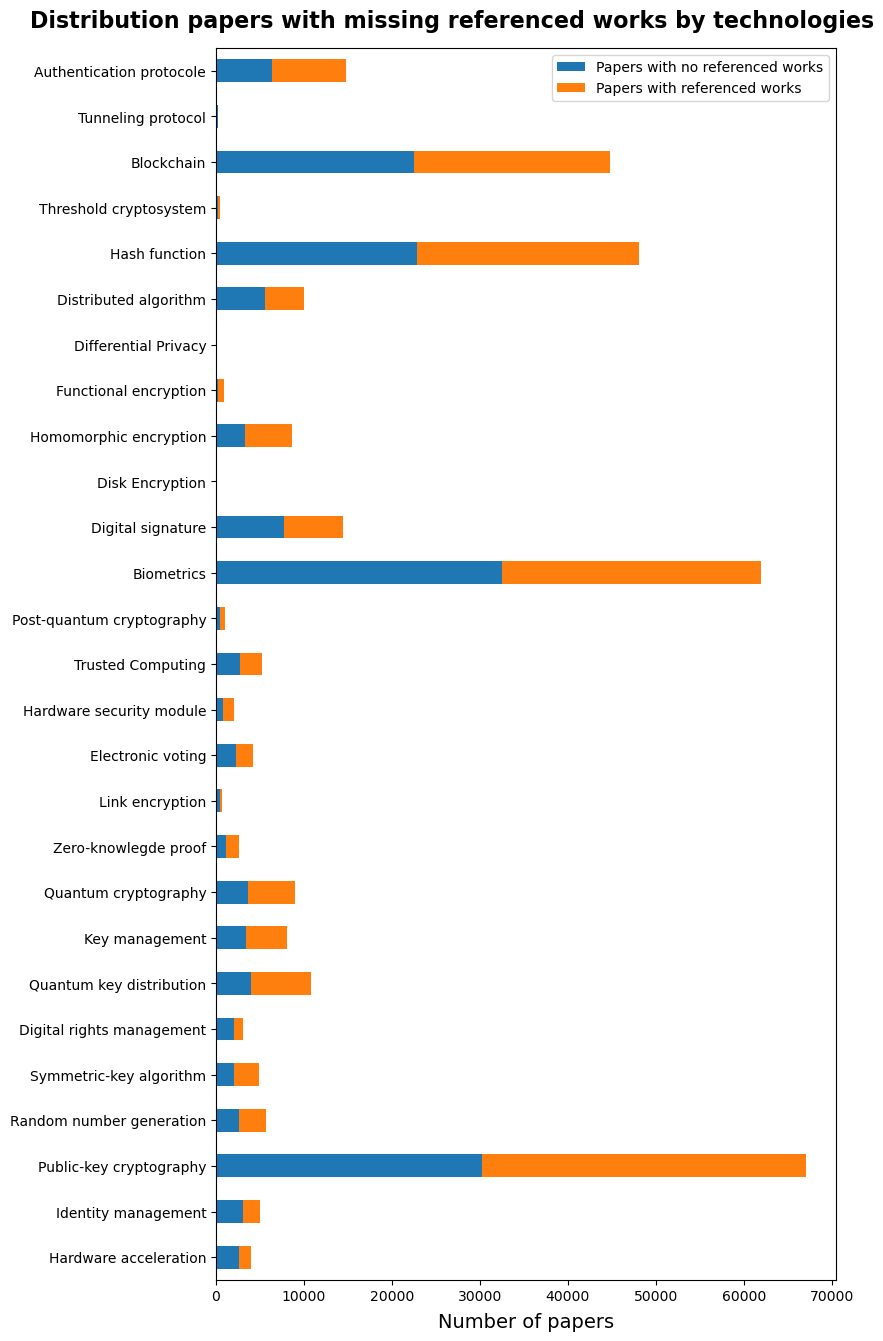

In [65]:
# lables and title specs
label_specs = {"fontsize": 14,"labelpad":6}
title_specs = {"fontsize": 16, "fontweight": "bold", "y": 1.01,"x":0.38}


# calling the plot
df_ref_concept.plot(kind="barh", stacked=True,figsize=(8,16))


# labels for x & y axis
plt.xlabel("Number of papers",**label_specs)
#plt.ylabel("Technologies",fontsize=14)

y_cor = np.arange(len(listconcepts)) 
plt.yticks(y_cor, listconcepts)

#plt.xscale('log')

# title of plot
plt.title("Distribution papers with missing referenced works by technologies",**title_specs)

plt.show()

__Observations__

We see that the amount of papers with missing referenced works is quite well distributed among the technologies. Visually it is between 40% and 60% for almost all technologies. This means that not considering these papers will not affect our studies too much, since a well-balanced sample of papers will still be considered to model and forecast the evolution of these technologies. Besides, as we will see later the technologies ```Disk Encryption```, ```Differential Privacy``` do not have any papers affiliated to them. For this reason, we will then exclude them from our network analysis.

We now do the same analysis and visualization of data for the variable ```abstract```.

In [49]:
listconcepts = list(set(df_full.concepts.tolist()))

list_numberpapers_noab=[]
list_numberpapers_ab=[]

for concept in tqdm(listconcepts):
    df_intermed = df_full.loc[df_full['concepts']==concept].copy()
    df_concept = df_intermed.loc[df_intermed['score_concepts']!=0].copy()
    number_papers_concept = len(list(set(df_concept.id.tolist())))
    df_concept_noab = df_concept.loc[df_concept.abstract.isnull()]
    number_papers_noab = len(list(set(df_concept_noab.id.tolist())))
    number_papers_ab = number_papers_concept-number_papers_noab
    list_numberpapers_noab.append(number_papers_noab)
    list_numberpapers_ab.append(number_papers_ab)


df_ab_concept = pd.DataFrame({'Papers with no abstracts':list_numberpapers_noab,
                               'Papers with abtracts':list_numberpapers_ab})


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [05:46<00:00, 12.82s/it]


In [51]:
df_ab_concept

,Papers with no abstracts,Papers with abtracts
0,369,3648
1,1111,3897
2,10152,56955
3,738,4904
4,559,4281
5,519,2520
6,1616,9167
7,1141,6957
8,1626,7397
9,534,2115


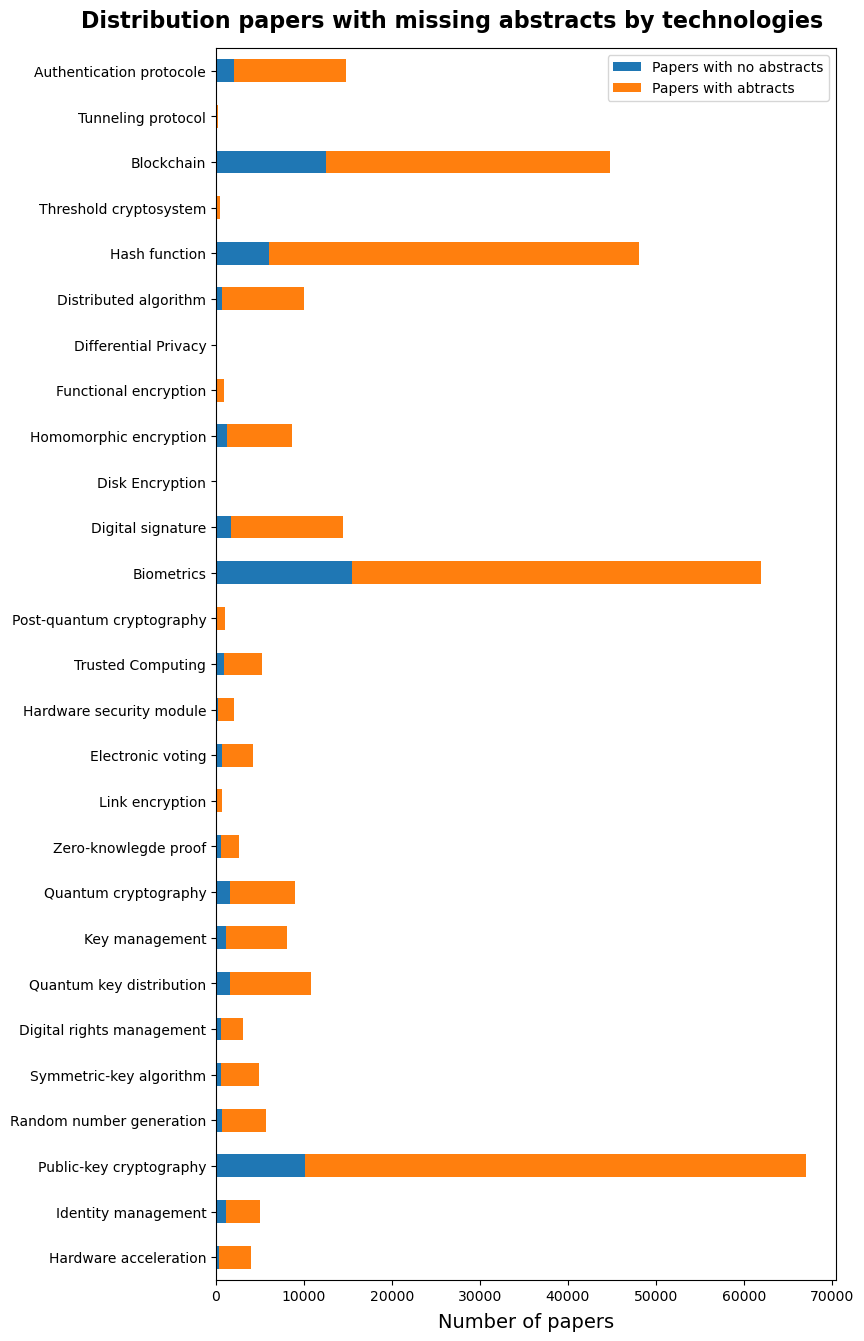

In [66]:
# lables and title specs
label_specs = {"fontsize": 14,"labelpad":6}
title_specs = {"fontsize": 16, "fontweight": "bold", "y": 1.01,"x":0.38}


# calling the plot
df_ab_concept.plot(kind="barh", stacked=True,figsize=(8,16))


# labels for x & y axis
plt.xlabel("Number of papers",**label_specs)
#plt.ylabel("Technologies")

y_cor = np.arange(len(listconcepts)) 
plt.yticks(y_cor, listconcepts)



# title of plot
plt.title("Distribution papers with missing abstracts by technologies", **title_specs)


plt.show()

__Observations__

We see that the amount of papers with missing abstracts is relatively well distributed among the technologies. The technologies with more papers tend to have a bigger proportion of papers with missing abstracts than technologies with less papers. Nevertheless, this is not too much of a problem since we already adressed this issue earlier.

<div class="alert-info">
6. Analysis of the unique values of the dataset
</div>

We now consider the unique values of our dataset.

In [67]:
unique_values = df_full.select_dtypes(include="object").nunique()
unique_values

id                  288701
title               275118
publication_date      7328
author              492397
referenced_works    107882
abstract            224435
concepts                27
score_concepts      303213
dtype: int64

__Observations__

As planned we have almost 200000 different papers for a period of 11 years. There are less unique titles and abstracts which is surprising. Nevertheless, since many abstracts are ```None``` (19% to be exact) this is not too surprising. Regarding the titles this is a big surprise, since we thought that every paper had only one webpage dedicated to it and not two or more. Indeed, we use the url of the webpages attributed to each paper as an id for each paper. We will analyze this problem below. 

Regarding the other variables, nothing seems to be strange. A lot of different publication dates, but since the scope of the data is over 11 years, this is quite reasonable. More authors than papers, but most of the papers are not produced by only one person, so this makes sense. There are only 70693 unique referenced works. This is due to the fact, that only approximatively 80000 papers have referenced works and most of this papers are among the 80000 papers that have already referenced works, since they are from the same field. Overall, except the number of unique titles compared to the number of unique ids everything looks reasonable. 

We now check, that there are indeed many papers that have two or more webpages dedicated to them in OpenAlex.

In [68]:
list_unique_titles = list(set(df_full.title.tolist()))
j=0

for title in list_unique_titles:
    mydf = df_full.loc[df_full['title']==title].copy()
    number_diff_papers = len(list(set(mydf.id.tolist())))
    if number_diff_papers>1:
        print(list(set(mydf.id.tolist())))
        j=j+1
    if j >5 :
        break 

['https://openalex.org/W4289330972', 'https://openalex.org/W2912267891']
['https://openalex.org/W4302331725', 'https://openalex.org/W2964109167', 'https://openalex.org/W2755425583']
['https://openalex.org/W2130136359', 'https://openalex.org/W4235971942']
['https://openalex.org/W2949867448', 'https://openalex.org/W4298839720']
['https://openalex.org/W4288256992', 'https://openalex.org/W2997374215', 'https://openalex.org/W2969463511']
['https://openalex.org/W3008821662', 'https://openalex.org/W3105753905']


We noticed that there are titles with non-unique ids on Open Alex. We will therefore filter the DataFrame and keep only the ids with the more information (abstracts and referenced works), if this does any difference. First, we need to take all the non-unique ids present in our dataset.

We first reduce our dataframe to the information we want.

In [69]:
list_unique_titles = list(set(df_full.title.tolist()))

df_title0 = df_full[["title", "id"]]
df_title = df_title0.drop_duplicates()
df_title

,title,id
0,The Kerberos Network Authentication Service (V5),https://openalex.org/W1635413415
1,Diameter Base Protocol,https://openalex.org/W2132391275
2,Privacy and security in library RFID,https://openalex.org/W2134011023
3,Authenticating Pervasive Devices with Human Pr...,https://openalex.org/W2160584199
4,Two-factor user authentication in wireless sen...,https://openalex.org/W2007287631
...,...,...
288696,Verifiability in e-Auction protocols & Brandt'...,https://openalex.org/W748367845
288697,Zero Energy - Zero Emission - Zero Waste = Zer...,https://openalex.org/W950663903
288698,Sporadic Solutions to Zero-One Exclusion Tasks,https://openalex.org/W952216897
288699,Some Constant-Round Zero-Knowledge Protocols,https://openalex.org/W966241803


We will now create a list of all the ids that are not unique, I mean, all the ids that refer to the same paper instead of referring to different papers.

In [70]:
from collections import Counter
# Give the list as static input and store it in a variable.
list_title_nouniqueids = df_title.title.tolist()

# Calculate the frequency of all the given list elements using the Counter()
# function which returns the element and its frequency as key-value pair
# and store this dictionary in a variable(say freqncyDictionary)
freqncyDictionary = Counter(list_title_nouniqueids)

# Take a new empty list say modifdlst and store it in a variable.
title_nouniqueids=[]
# Loop in the above calculated frequency dictionary using the For loop
for key in freqncyDictionary:
  # Check if the key in the freqncyDictionary having value greater than 1
  # using the if conditional statement.
    if(freqncyDictionary[key] > 1):
      # If it is true then append the key value to the above declared empty list modifdlst.
        title_nouniqueids.append(key)
        
#Print all the elements from a given list that appears more than once.
print('There are '+str(len(title_nouniqueids))+' papers with more than one id in the OpenAlex database')

There are 11074 papers with more than one id in the OpenAlex database


Now we create two lists out of the list of ids referring to the same paper. One list is the list of bad ids, that is the ids with no ```referenced_works``` or no ```abstracts```. One list is the list of good ids, that is for each paper with multiple ids, I selected the id which maximized the number of information we could have with the ids of this paper. Since it is worse not having referenced works than not having an abstract, I decided to attribute bigger negative points to the ids with no referenced works, than to the one with no abstracts and then to choose the id that minimizes the negative points.

In [71]:
list_good_ids = []
list_bad_ids=[]

df_check0 = df_full[["title", "id","abstract","referenced_works"]]
df_check = df_check0.drop_duplicates()

for title in tqdm(title_nouniqueids):
    infos = df_title.loc[df_title['title']==title].copy()
    mynon_uniqueids = infos.id.tolist()
    list_ranking_ids = []
    for paper in mynon_uniqueids:
        df_mypaper = df_check.loc[df_check['id']==paper].copy()
        neg_point_ref = 2*len(df_mypaper.loc[df_mypaper.referenced_works.isnull()])
        neg_point_ab = 1*len(df_mypaper.loc[df_mypaper.abstract.isnull()])
        list_ranking_ids.append(neg_point_ref+neg_point_ab)
    # I choose the best value among my list
    best_val = min(list_ranking_ids)
    # I choose one of the ids related to this best value
    # note that to have missing referenced works is worse than having missing abstract, that is why the negative 
    # point is bigger. So between an id with no abstract but referenced works and an id with no referenced works but 
    # an abstract the algorithm will choose the first one.
    mybestid = mynon_uniqueids[list_ranking_ids.index(best_val)]
    mybadids = mynon_uniqueids
    mybadids.remove(mybestid)
    list_good_ids.append(mybestid)
    list_bad_ids = list_bad_ids +mybadids

print(len(list_good_ids))
print(len(list_bad_ids))

100%|████████████████████████████████████████████████████████████████████████████| 11074/11074 [51:27<00:00,  3.59it/s]

11074
13583


We do a security check, to be sure that both lists do not intersect.

In [72]:
listinter = [x for x in list_good_ids if x in list_bad_ids]

listinter

[]

Later in this notebook I will select only the ids that are not bad, according to my selection above. 
Nevertheless, I will first analyze the distribution of papers among time.

<div class="alert-info">
6. Analysis of the distribution of papers among time.
</div>

I import again this version of df_full, since it is more manageable for my purpose.

In [73]:
infile_df_full = open('../creation_data_and_variables/data_creation_variables/df_full','rb')
df_full_time = pickle.load(infile_df_full)
infile_df_full.close()

In [74]:
df_full_time = df_full_time[['title','year','month','publication_date']]

df_full_time=df_full_time.drop_duplicates()

df_full_time

,title,year,month,publication_date
0,The Kerberos Network Authentication Service (V5),2005,July,2005-07-01
1,Diameter Base Protocol,2003,September,2003-09-01
2,Privacy and security in library RFID,2004,October,2004-10-25
3,Authenticating Pervasive Devices with Human Pr...,2005,August,2005-08-14
4,Two-factor user authentication in wireless sen...,2009,March,2009-03-01
...,...,...,...,...
288696,Verifiability in e-Auction protocols & Brandt'...,2013,March,2013-03-17
288697,Zero Energy - Zero Emission - Zero Waste = Zer...,2008,August,2008-08-27
288698,Sporadic Solutions to Zero-One Exclusion Tasks,2014,July,2014-07-08
288699,Some Constant-Round Zero-Knowledge Protocols,2010,January,2010-01-01


I do now visualize the average distribution of papers among the months over the period from 2012 to 2022.

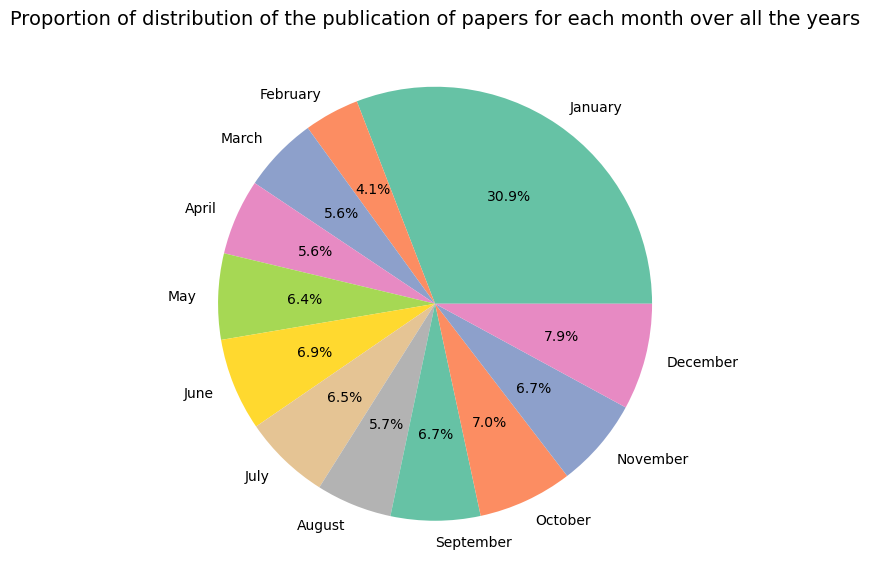

In [75]:
# little fancy visualization of the proportion of distribution of the publication of papers over all the years
my_months = ['January','February','March','April','May','June','July','August','September','October','November','December']

data = []

for month in my_months:
    data.append(len(df_full_time.loc[df_full_time['month']==month]))

# labels for radability and intepretation
labels = ['January','February','March','April','May','June','July','August','September','October','November','December']


# colors
colors = sns.color_palette("Set2")


f = plt.figure()
f.set_figwidth(7)
f.set_figheight(9)
# creating the pie chart
plt.pie(data, labels=labels, colors=colors, autopct="%0.1f%%")


# title
plt.title(
    "Proportion of distribution of the publication of papers for each month over all the years",
    color="black",  # I am using the 'white' color here, as I am using the 'dark mode' of Jupyter Lab.
    fontsize=14,
)


# calling the pie chart
plt.show()

__Observation__

We see that there are a lot of papers that are published in January. This is because, papers with no clear publication date have an artificial publication date which is the 1st of January. We will now visualize the number of papers published by day in January for each year.

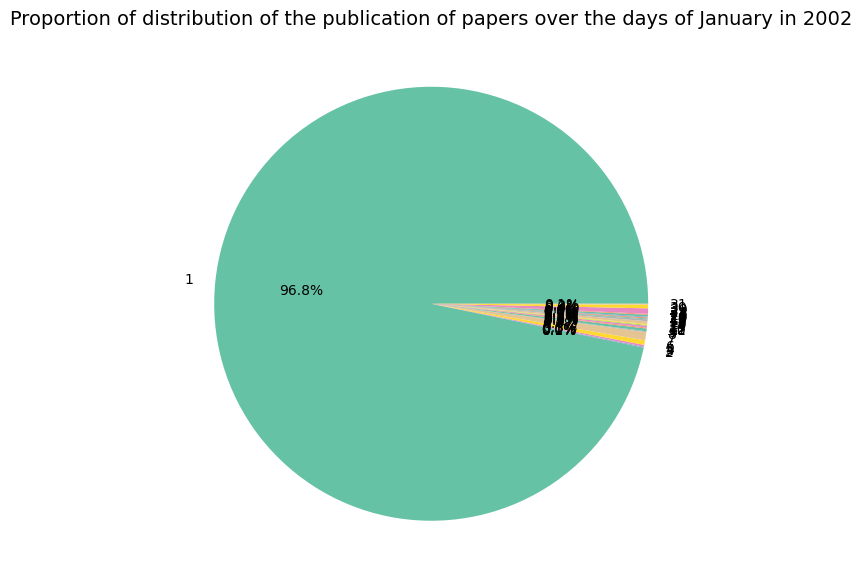

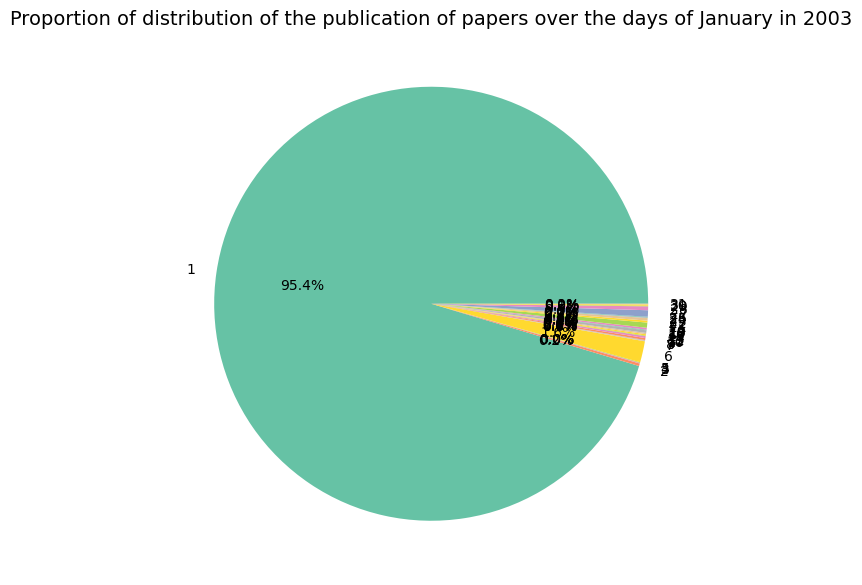

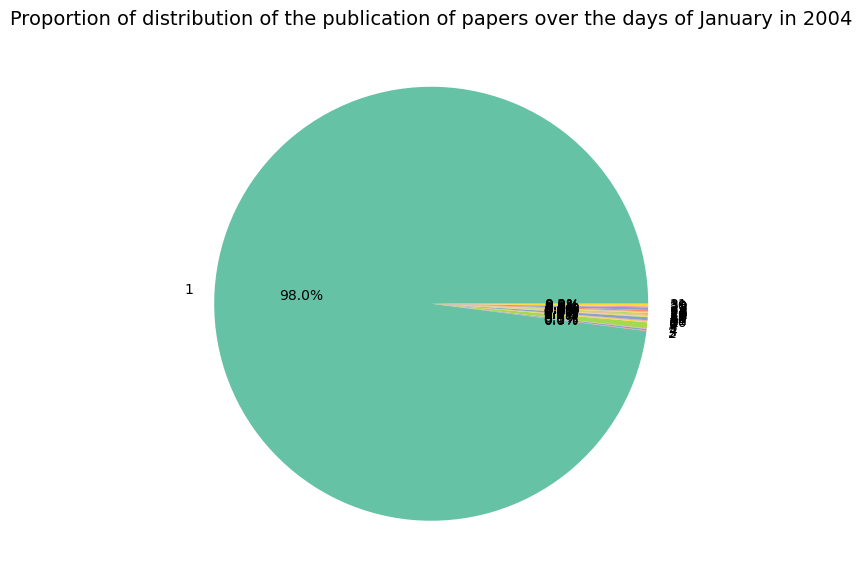

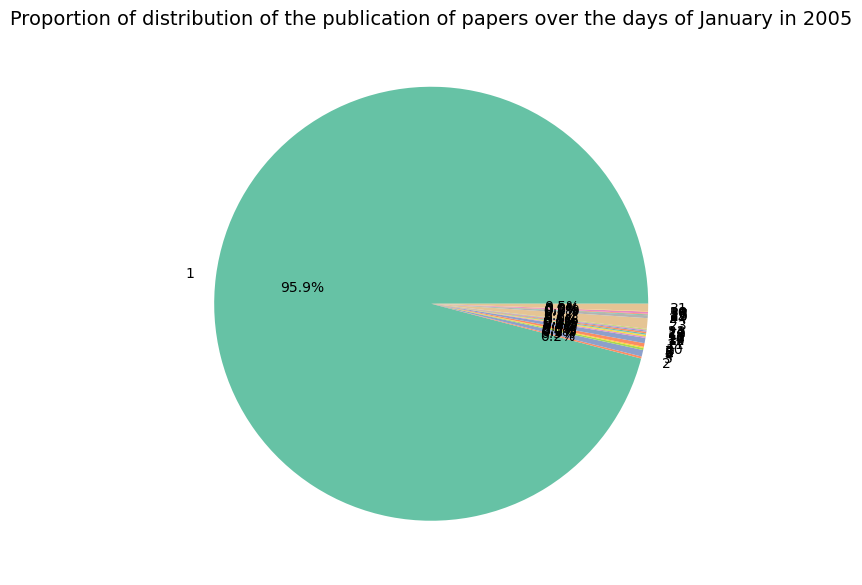

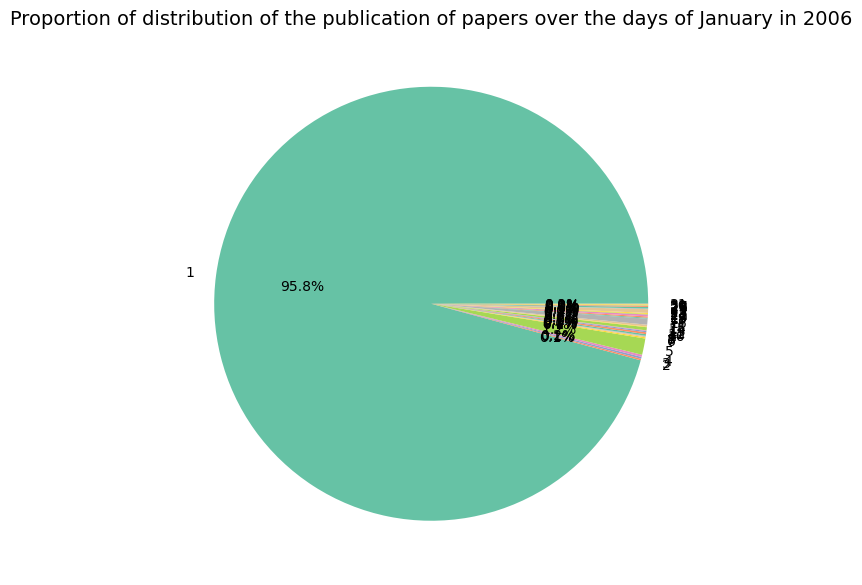

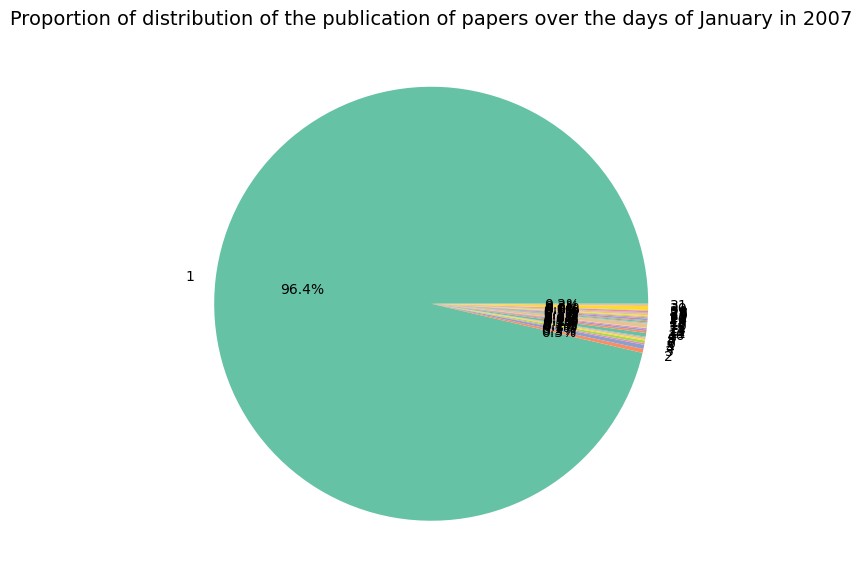

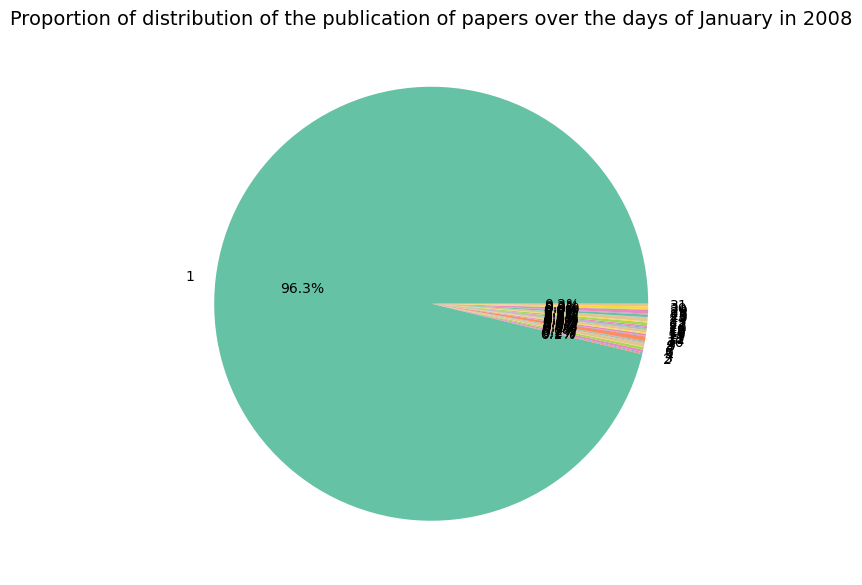

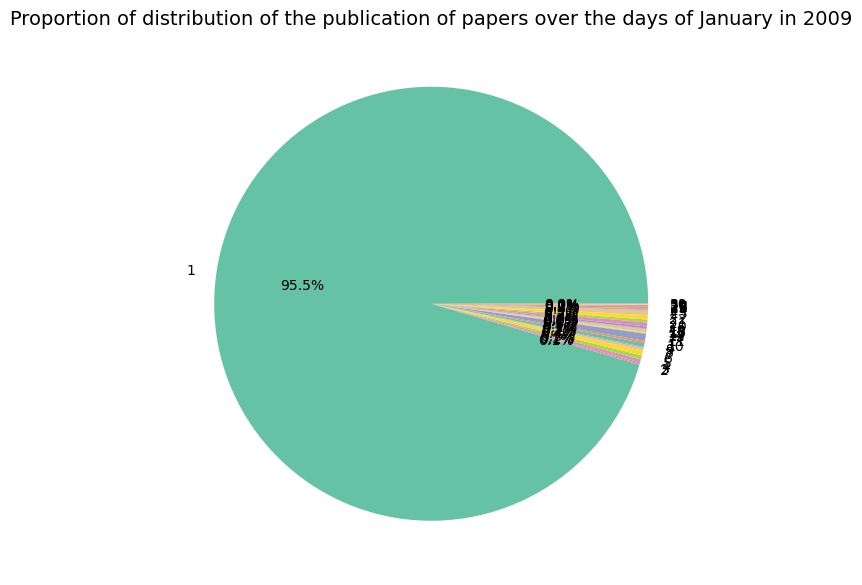

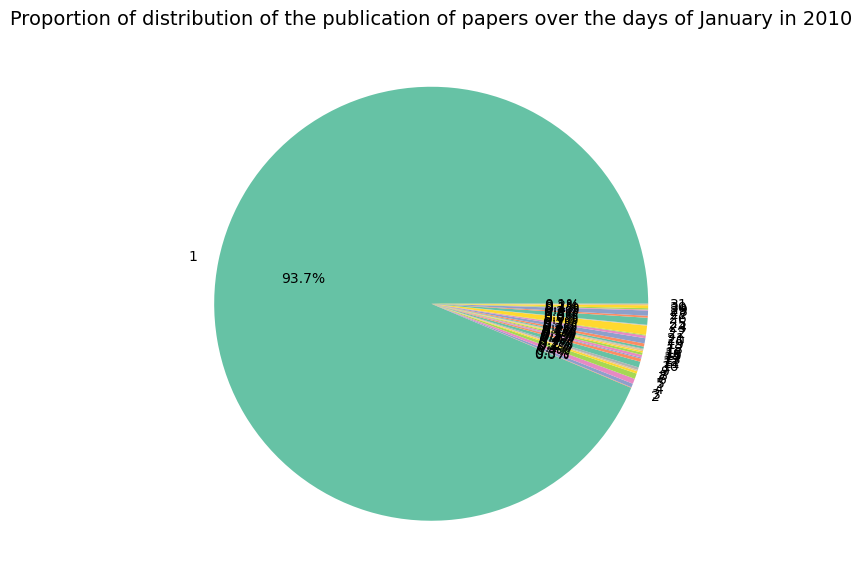

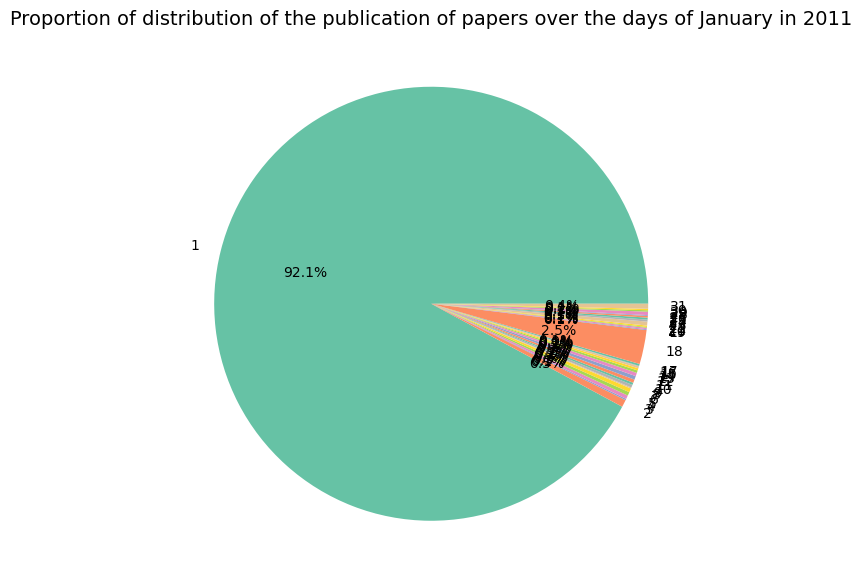

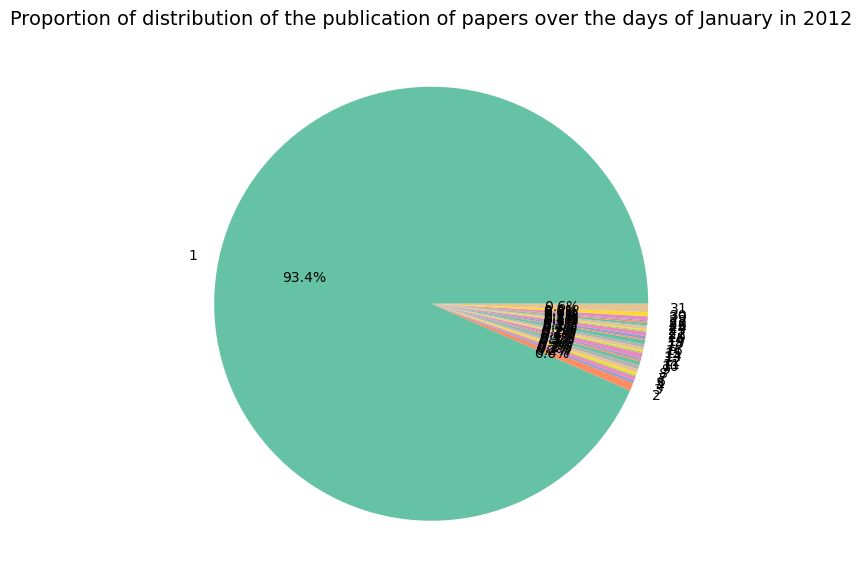

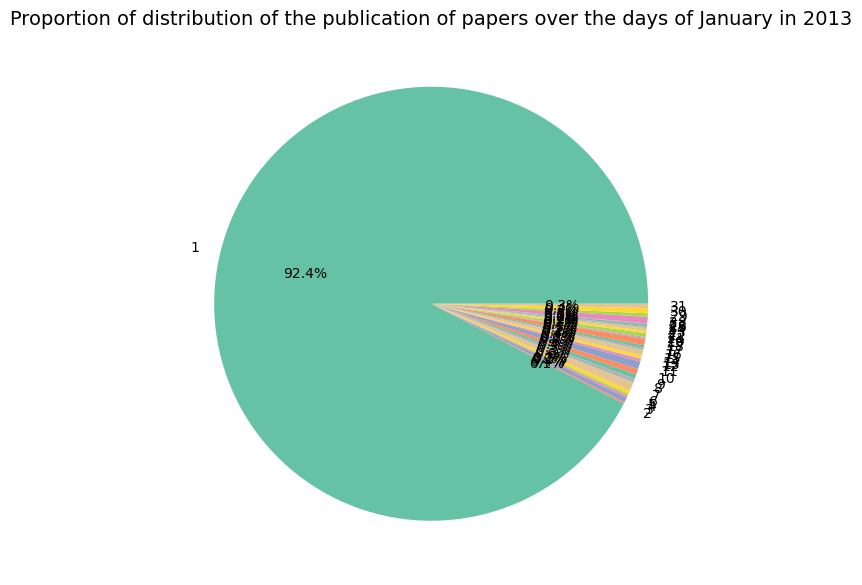

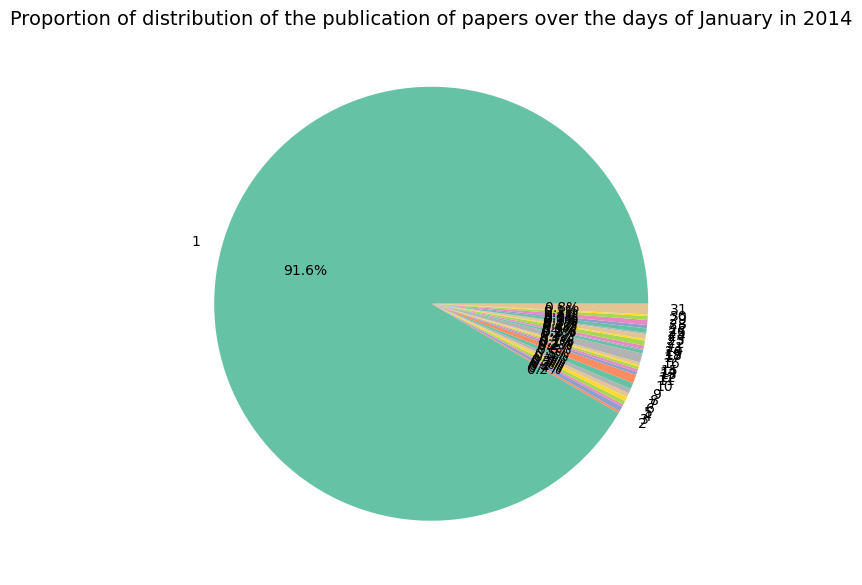

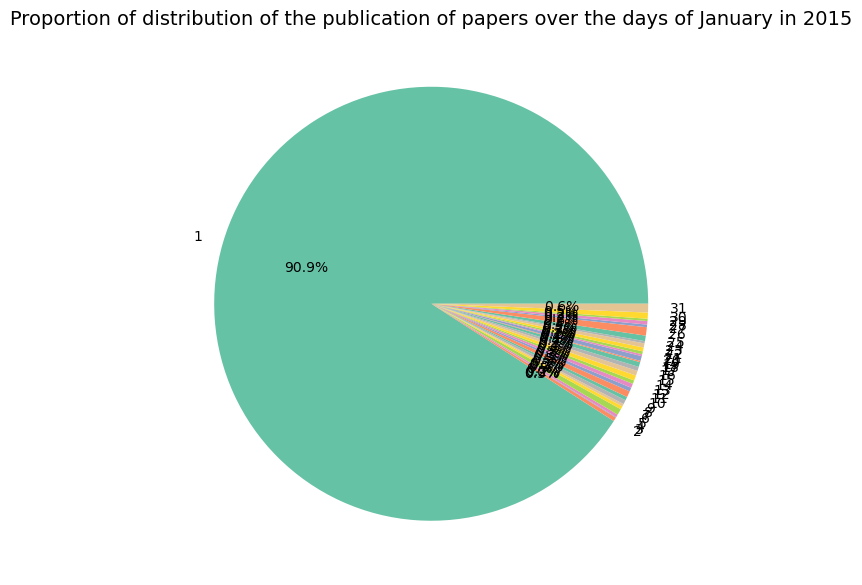

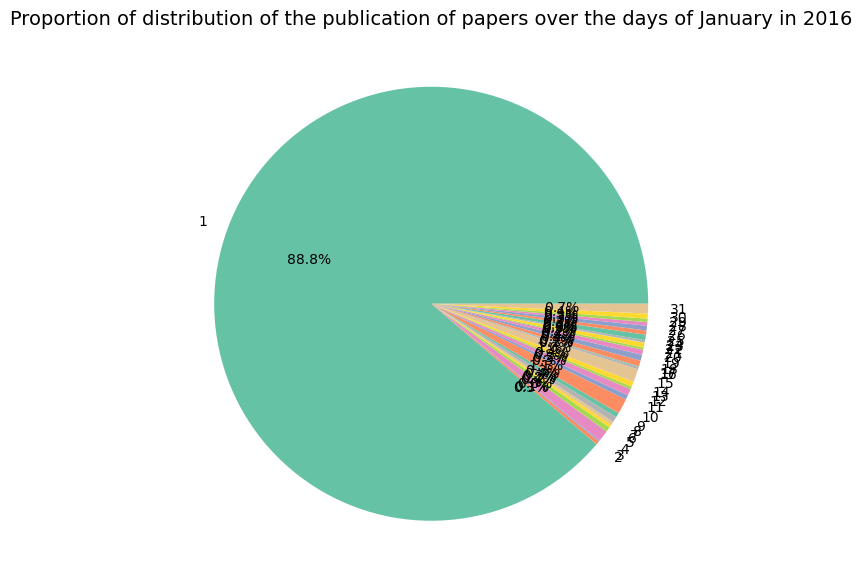

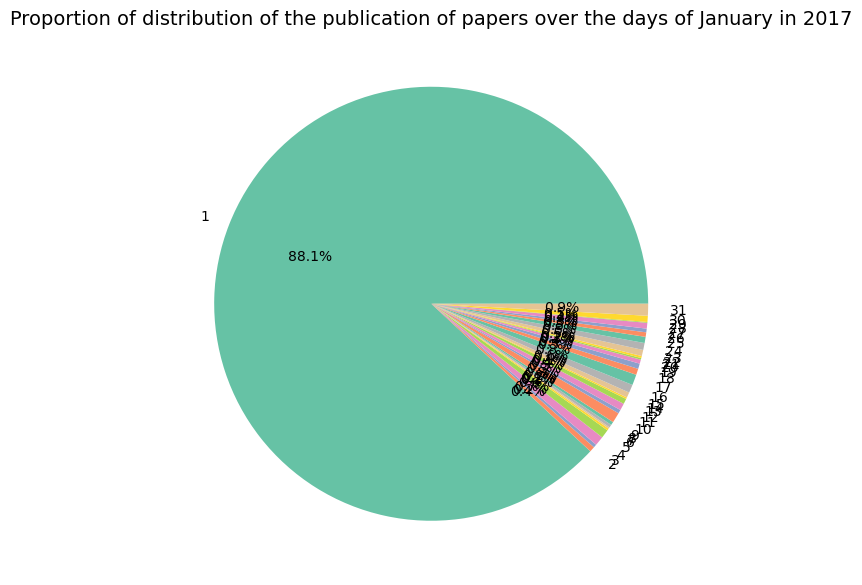

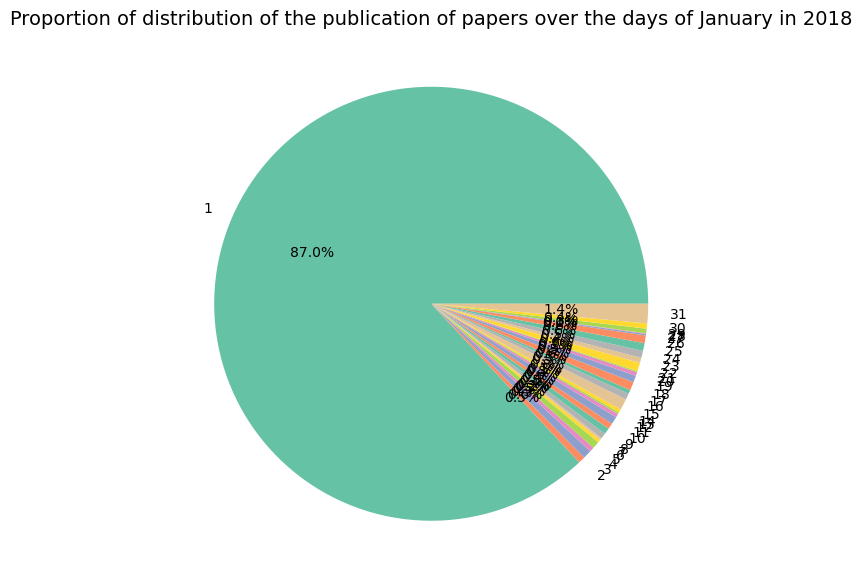

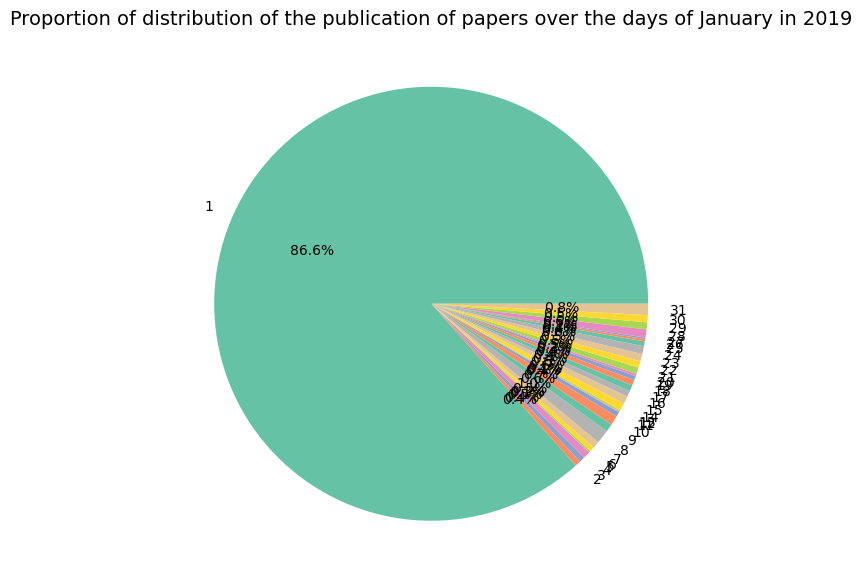

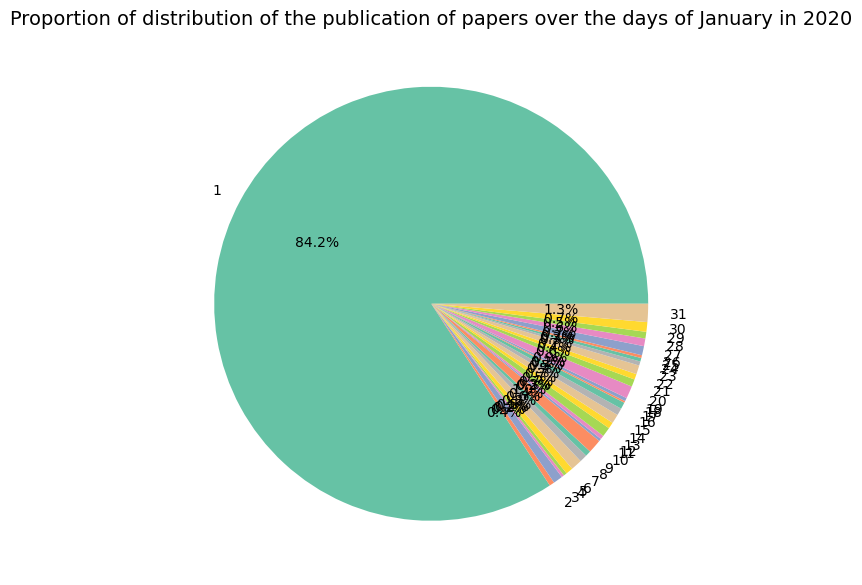

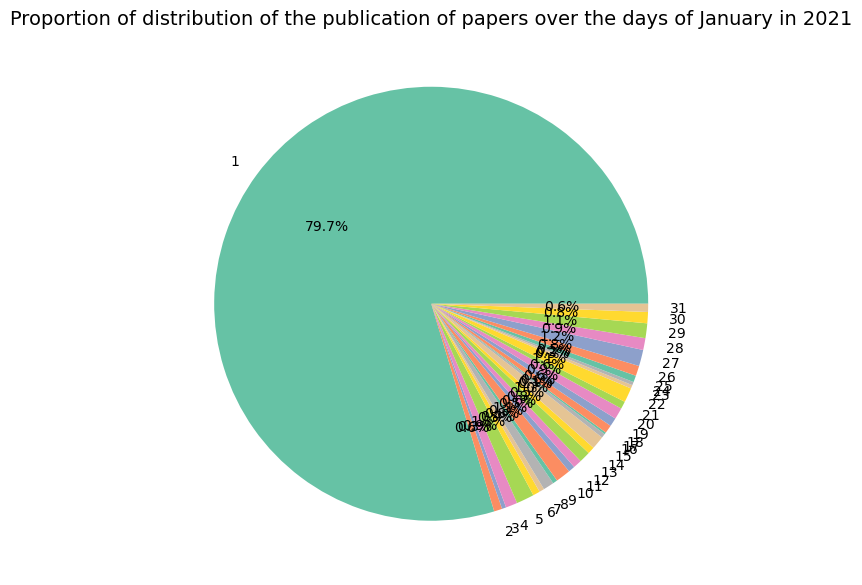

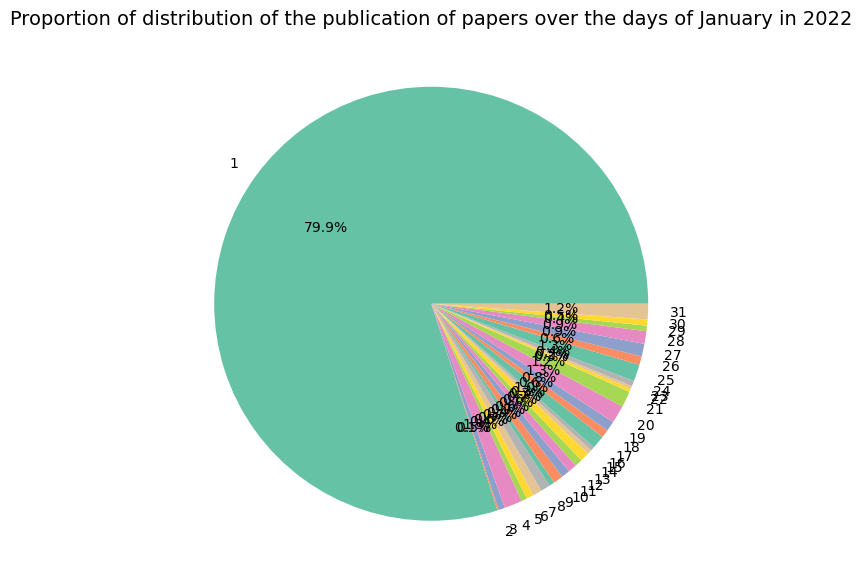

In [76]:
# little fancy visualization of the proportion of distribution of the publication of papers over all the years

my_years = [2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]
df_january = df_full_time.loc[df_full_time['month']=='January']

for year in my_years:
    labels = []
    numberpublishedpapers_day = []
    for i in range(1,32):
        labels.append(i)
        if i<10:
            day ='0'+str(i)
        else:
            day=str(i)
        numberpublishedpapers_day.append(len(df_january.loc[df_january['publication_date']==str(year)+'-01-'+day]))
    # colors
    colors = sns.color_palette("Set2")


    f = plt.figure()
    f.set_figwidth(7)
    f.set_figheight(9)
    # creating the pie chart
    plt.pie(numberpublishedpapers_day, labels=labels, colors=colors, autopct="%0.1f%%")


    # title
    plt.title(
    "Proportion of distribution of the publication of papers over the days of January in "+str(year),
    color="black",  # I am using the 'white' color here, as I am using the 'dark mode' of Jupyter Lab.
    fontsize=14)


    # calling the pie chart
    plt.show()

__Observations__

As expected, most of the papers published in January were published the first of January. This an artificial bias. To compare this to other months, we will now visualize the distribution of papers among the day of each month all years put together. 

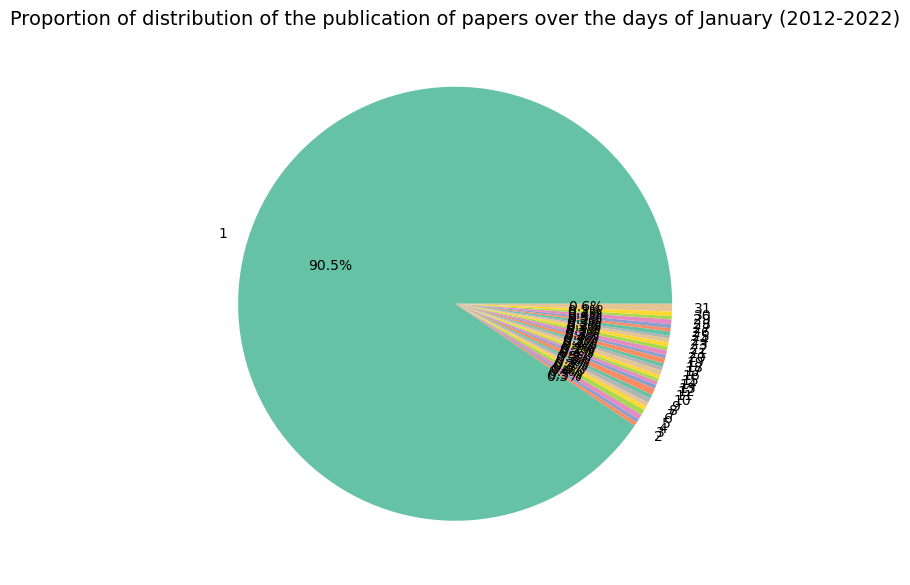

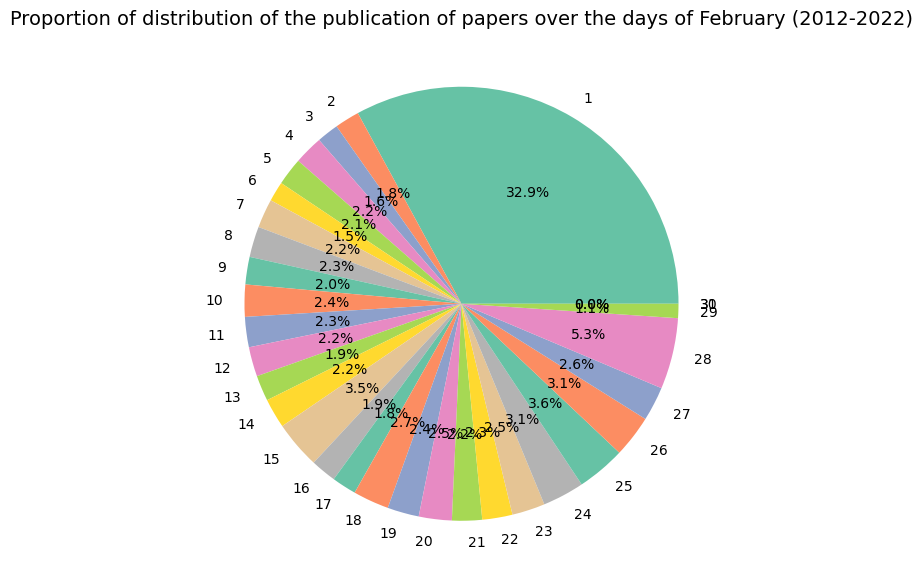

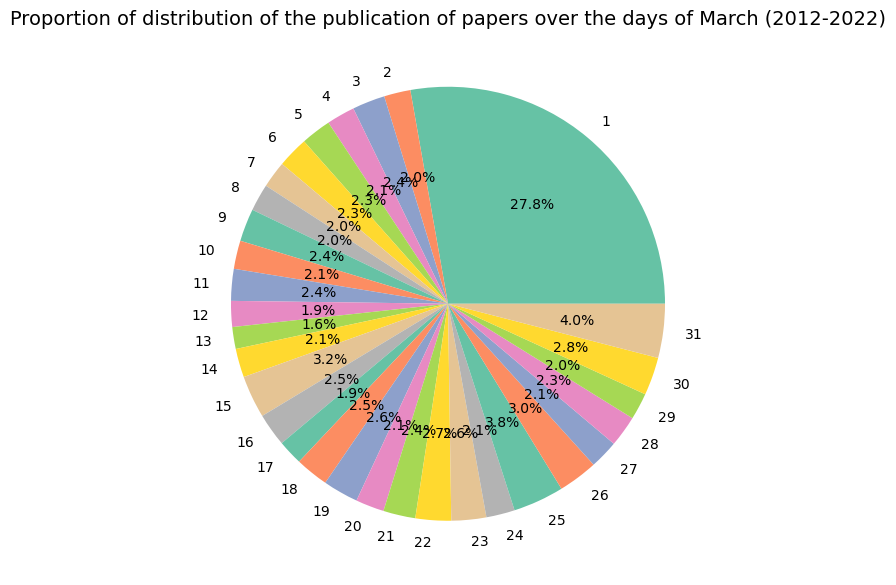

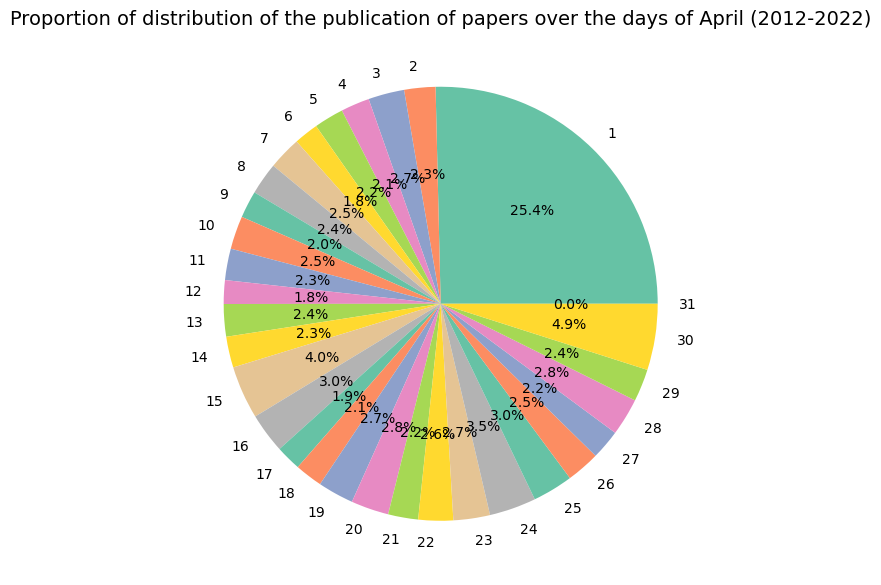

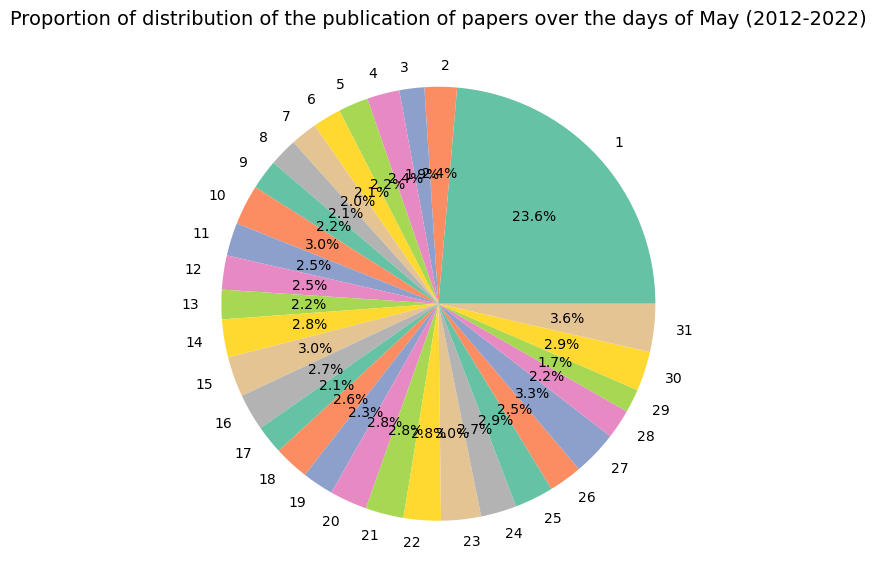

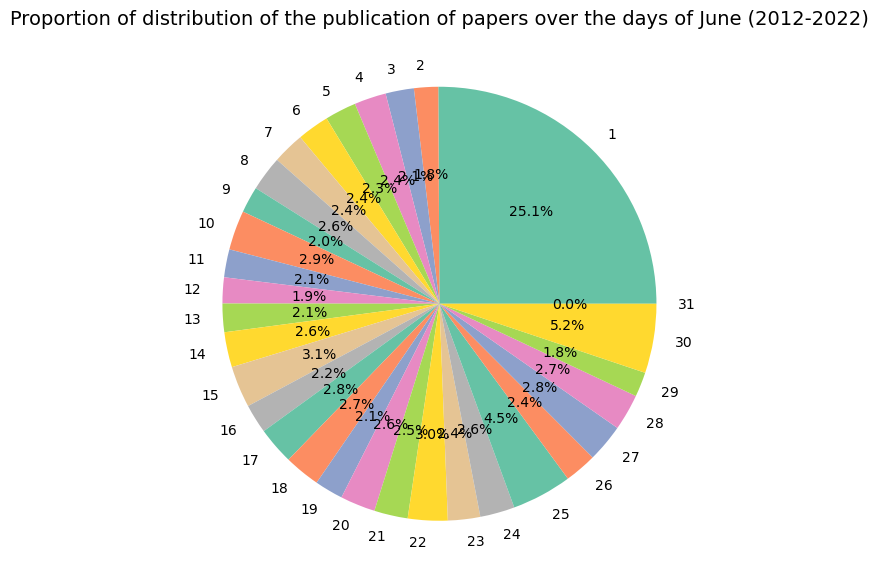

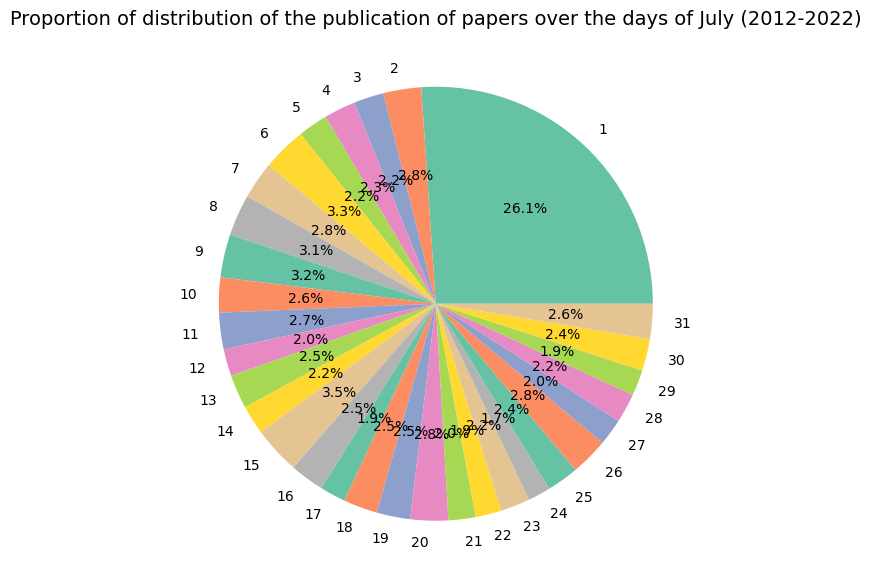

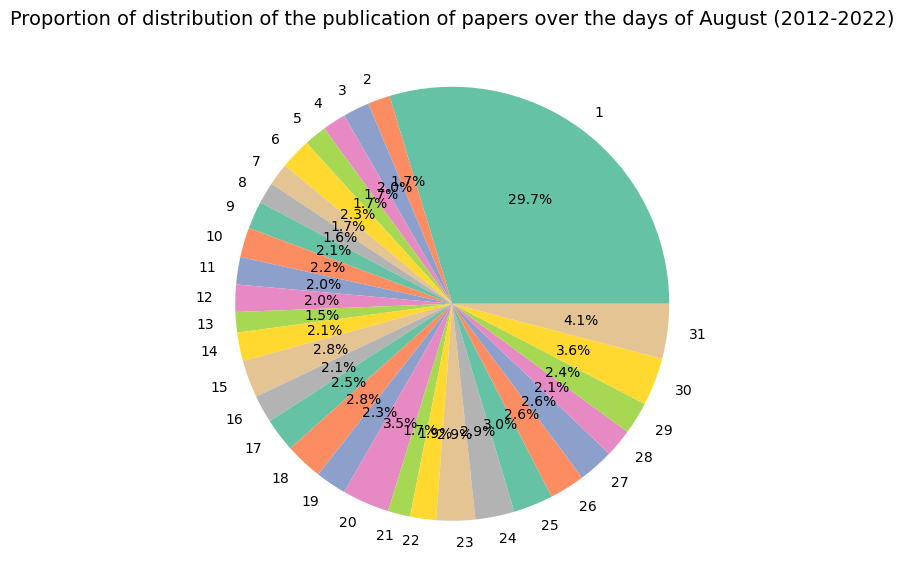

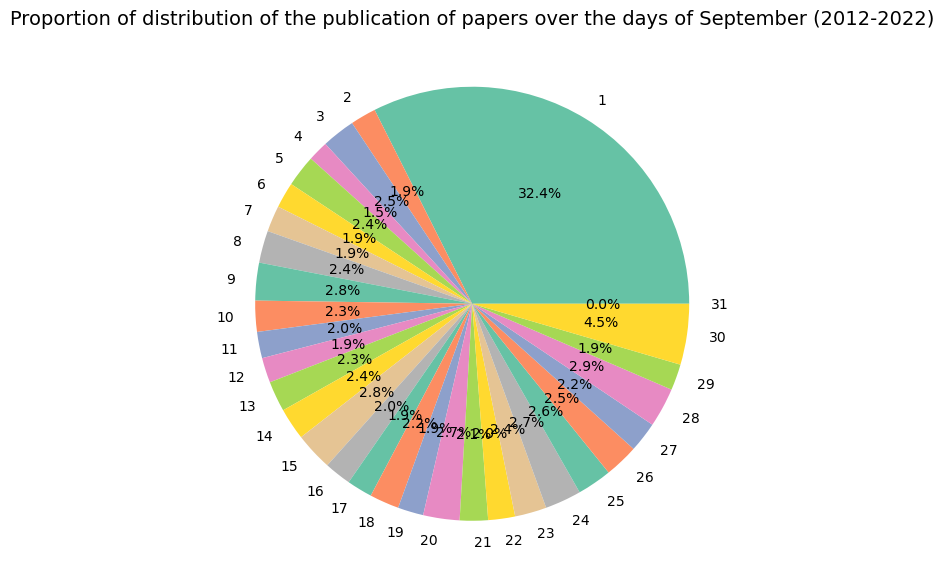

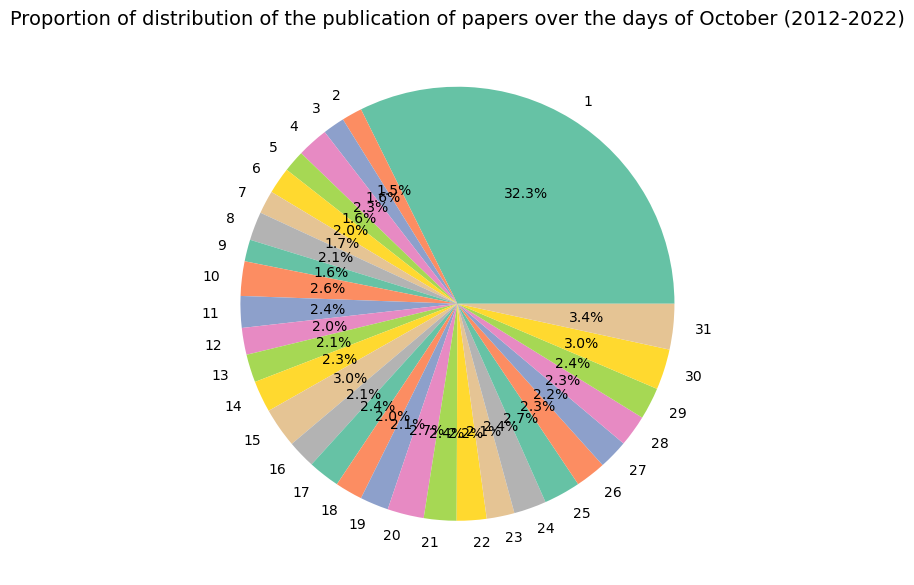

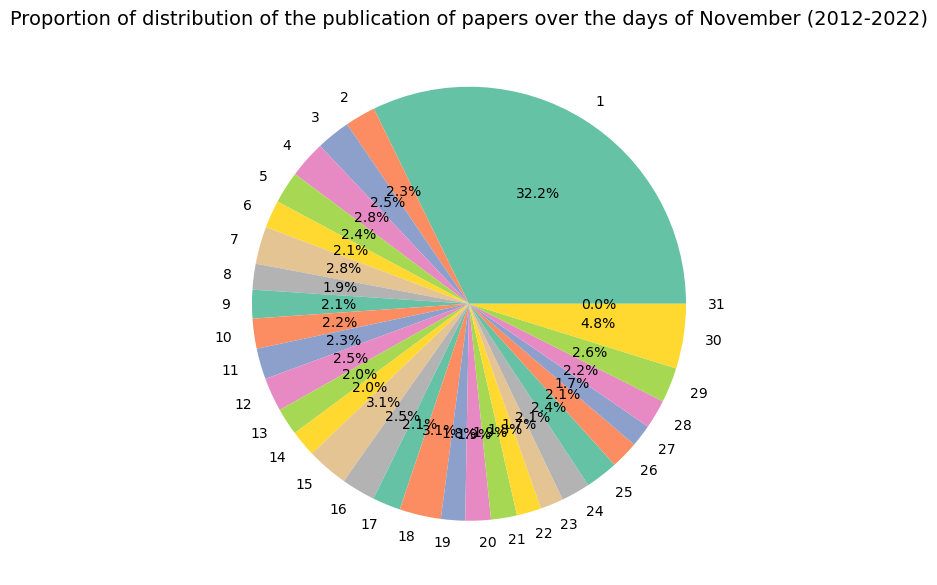

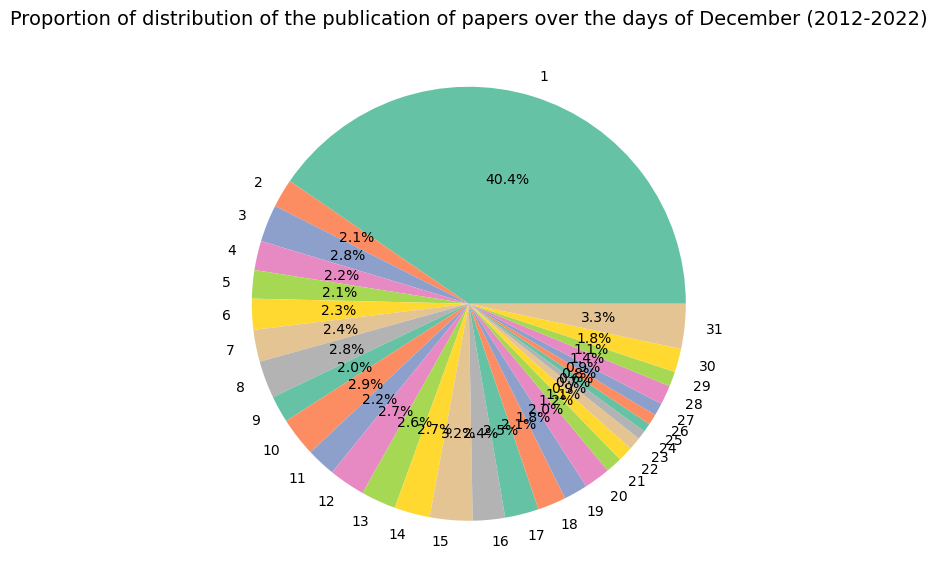

In [77]:
# little fancy visualization of the proportion of distribution of the publication of papers 
# over the days of each month over all the years 

my_years = [2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]
my_months = ['January','February','March','April','May','June','July','August','September','October','November','December']


for month in my_months:
    df_month = df_full_time.loc[df_full_time['month']==month].copy()
    #print(df_month)
    labels = []
    numberpublishedpapers_day = []
    for i in range(1,32):
        labels.append(i)
        if i<10:
            day ='0'+str(i)
        else:
            day=str(i)
        if my_months.index(month)<9:
            mymonth = '0'+str(my_months.index(month)+1)
        else:
            mymonth=str(my_months.index(month)+1)
        totalnumberpaper_byday = 0
        for year in my_years:
            #print(df_month.loc[df_month['publication_date']=='2015-01-23'])   
            totalnumberpaper_byday=totalnumberpaper_byday + \
            len(df_month.loc[df_month['publication_date']==str(year)+'-'+mymonth+'-'+day])
        numberpublishedpapers_day.append(totalnumberpaper_byday)
    # colors
    colors = sns.color_palette("Set2")


    f = plt.figure()
    f.set_figwidth(7)
    f.set_figheight(9)
    # creating the pie chart
    plt.pie(numberpublishedpapers_day, labels=labels, colors=colors, autopct="%0.1f%%")


    # title
    plt.title(
    "Proportion of distribution of the publication of papers over the days of "+str(month)+" (2012-2022)",
    color="black",  
    fontsize=14)


    # calling the pie chart
    plt.show()

__Observation__

For January the proportion of papers put the first of January is more than 2 times bigger than for other months. Nonetheless, in every month there is a lot of papers that are published the 1st of the month. It is a bit complicated, what should be the best choice to make.

There are two possibilities: either we do redistribute the data over the year uniformly, assuming that the distribution is uniform (which itself would create a bias, since for some technologies, it heavenly depends on conferences that are not uniformly distributed over the year). Or I simply delete this data. In fact, considering and creating artificially this data could result in a bias in my analysis. But then, how should I delete this data?

We decided to redistribute the excess of papers in January, which represents almost 20% of all the papers I have, over the years. In fact, this will allow us to keep some information and to redistribute uniformly a noise that is quite moderate. To do so, I download another version of the same dataframe, whose columns containing a list were not exploded. This allows me to be much faster in the replacement of the publications dates. In fact, I have to deal with 200'000 rows instead of 70 millions.

In [78]:
infile_df_full_notexploded = open('../creation_data_and_variables/data_creation_variables/df_full_notexploded','rb')
df_full_notexploded = pickle.load(infile_df_full_notexploded)
infile_df_full_notexploded.close()

__Cleaning and elimating undesired rows__ 

We now want to clean the dataset eliminating all the rows we do not want (no referenced works, double ids, etc.).

We first drop all the "bad ids" that we computed before. We filter the dataset to obtain only a dataset with one unique id by paper.

In [79]:
df_full_notexploded = df_full_notexploded[~df_full_notexploded['id'].isin(list_bad_ids)]

Little check to be sure all the bad ids were suppressed from my database:

In [80]:
df_full_notexploded[df_full_notexploded['id'].isin(list_bad_ids)]

,id,title,publication_date,author,referenced_works,abstract,concepts,score_concepts,year,month


We now want to eliminate all the rows without referenced papers. We first explode df_full_notexploded with respect to ```referenced_works``` and we then eliminate all the rows with no referecend works.

In [81]:
df_full_notexploded=df_full_notexploded.explode('referenced_works')

In [82]:
df_full_notexploded = df_full_notexploded[df_full_notexploded.referenced_works.notnull()]

In [83]:
df_full_notexploded

,id,title,publication_date,author,referenced_works,abstract,concepts,score_concepts,year,month
2,https://openalex.org/W2134011023,Privacy and security in library RFID,2004-10-25,"[https://openalex.org/A2001305480, https://ope...",https://openalex.org/W77932805,We expose privacy issues related to Radio Fre...,"[Authentication protocole, Biometrics, Blockch...","[0.41179907, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2004,October
2,https://openalex.org/W2134011023,Privacy and security in library RFID,2004-10-25,"[https://openalex.org/A2001305480, https://ope...",https://openalex.org/W2470325412,We expose privacy issues related to Radio Fre...,"[Authentication protocole, Biometrics, Blockch...","[0.41179907, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2004,October
3,https://openalex.org/W2160584199,Authenticating Pervasive Devices with Human Pr...,2005-08-14,"[https://openalex.org/A46726047, https://opena...",https://openalex.org/W1514141030,AbstractForgery and counterfeiting are emergi...,"[Authentication protocole, Biometrics, Blockch...","[0.61227363, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2005,August
4,https://openalex.org/W2007287631,Two-factor user authentication in wireless sen...,2009-03-01,[https://openalex.org/A2148661923],https://openalex.org/W1521079621,Wireless sensor networks (WSN) are typically ...,"[Authentication protocole, Biometrics, Blockch...","[0.6147633, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",2009,March
4,https://openalex.org/W2007287631,Two-factor user authentication in wireless sen...,2009-03-01,[https://openalex.org/A2148661923],https://openalex.org/W2053134894,Wireless sensor networks (WSN) are typically ...,"[Authentication protocole, Biometrics, Blockch...","[0.6147633, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",2009,March
...,...,...,...,...,...,...,...,...,...,...
288700,https://openalex.org/W98729159,Zero-knowledge against quantum attacks (Prelim...,2005-01-01,[https://openalex.org/A2984226480],https://openalex.org/W389490173,This paperprovesthat several interactiveproof...,"[Authentication protocole, Biometrics, Blockch...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2005,January
288700,https://openalex.org/W98729159,Zero-knowledge against quantum attacks (Prelim...,2005-01-01,[https://openalex.org/A2984226480],https://openalex.org/W1549361339,This paperprovesthat several interactiveproof...,"[Authentication protocole, Biometrics, Blockch...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2005,January
288700,https://openalex.org/W98729159,Zero-knowledge against quantum attacks (Prelim...,2005-01-01,[https://openalex.org/A2984226480],https://openalex.org/W1594537107,This paperprovesthat several interactiveproof...,"[Authentication protocole, Biometrics, Blockch...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2005,January
288700,https://openalex.org/W98729159,Zero-knowledge against quantum attacks (Prelim...,2005-01-01,[https://openalex.org/A2984226480],https://openalex.org/W2069170136,This paperprovesthat several interactiveproof...,"[Authentication protocole, Biometrics, Blockch...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2005,January


We finally cleaned our dataset eliminating all the undesired rows. We wil now redistribute equally among the months the excess of papers in January. I will then visualize again the distribution of papers among the months.

In [84]:
my_years = [2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]
my_months = ['January','February','March','April','May','June','July','August','September','October','November','December']

# this function changes the date of a paper putting year-month-15 (the day is 15 always).

def change_date(paper,year,indexmonth):
    paper.loc["publication_date"] = str(year)+'-'+str(indexmonth+1)+'-15'
    paper.loc["month"]= my_months[indexmonth]
    paper.loc["year"] = year
    return paper

for year in my_years:
    df_year= df_full_notexploded.loc[df_full_notexploded['year']==year].copy()
    sum_papers_month=[]
    for month in my_months:
        sum_papers_month.append(len(df_year.loc[df_year['month']==month]))
    median = statistics.median(sum_papers_month)

    df_january = df_year.loc[df_year['month']=='January'].copy()
    list_titles = df_january.title.tolist()
    # titles we will distributed over the months
    titles_tobe_distributed = list_titles[int(median):]
    step = math.floor(int(len(titles_tobe_distributed)/12))
    for i in tqdm(range(12)):
        month = my_months[i]
        start = i*step
        end=(i+1)*step
        if i ==11:
            mysubset_papers =titles_tobe_distributed[start:]
        else:
            mysubset_papers =titles_tobe_distributed[start:end]
        #df_full.apply(lambda x:print(x),axis=1)
        df_full_notexploded=df_full_notexploded.apply(lambda x: change_date(x,year,i) if x.title in mysubset_papers else x,axis = 1)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [18:59<00:00, 94.95s/it]


Now I explode all the columns I have in order to have a cleaner version of my database.

In [85]:
df_full_cleaned =df_full_notexploded.explode('author')
df_full_cleaned =df_full_cleaned.explode(['concepts', 'score_concepts'])

I visualize the distribution over time of my data again, in order to see the changes.

In [86]:
df_full_time = df_full_cleaned[['title','year','month','publication_date']]

df_full_time=df_full_time.drop_duplicates()

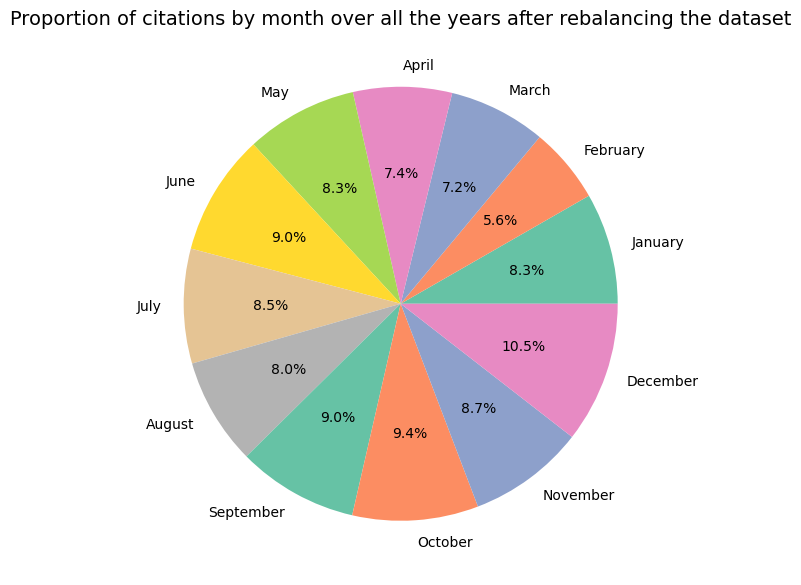

In [87]:
# little fancy visualization for the distribution of papers among the months
my_months = ['January','February','March','April','May','June','July','August','September','October','November','December']

data = []

for month in my_months:
    data.append(len(df_full_time.loc[df_full_time['month']==month]))

# labels for radability and intepretation
labels = ['January','February','March','April','May','June','July','August','September','October','November','December']


# colors
colors = sns.color_palette("Set2")


f = plt.figure()
f.set_figwidth(7)
f.set_figheight(9)
# creating the pie chart
plt.pie(data, labels=labels, colors=colors, autopct="%0.1f%%")


# title
plt.title(
    "Proportion of citations by month over all the years after rebalancing the dataset",
    color="black",  # I am using the 'white' color here, as I am using the 'dark mode' of Jupyter Lab.
    fontsize=14,
)


# calling the pie chart
plt.show()

__Observations__

Everything is fine and we have indeed a more uniform distribution of the publication of the papers over the months.

__Filtering the references__

We must filter our referenced works, since only so can it make sense with our further computations.

In [88]:
df_full_cleaned

,id,title,publication_date,author,referenced_works,abstract,concepts,score_concepts,year,month
2,https://openalex.org/W2134011023,Privacy and security in library RFID,2004-10-25,https://openalex.org/A2001305480,https://openalex.org/W77932805,We expose privacy issues related to Radio Fre...,Authentication protocole,0.41179907,2004,October
2,https://openalex.org/W2134011023,Privacy and security in library RFID,2004-10-25,https://openalex.org/A2001305480,https://openalex.org/W77932805,We expose privacy issues related to Radio Fre...,Biometrics,0,2004,October
2,https://openalex.org/W2134011023,Privacy and security in library RFID,2004-10-25,https://openalex.org/A2001305480,https://openalex.org/W77932805,We expose privacy issues related to Radio Fre...,Blockchain,0,2004,October
2,https://openalex.org/W2134011023,Privacy and security in library RFID,2004-10-25,https://openalex.org/A2001305480,https://openalex.org/W77932805,We expose privacy issues related to Radio Fre...,Differential Privacy,0,2004,October
2,https://openalex.org/W2134011023,Privacy and security in library RFID,2004-10-25,https://openalex.org/A2001305480,https://openalex.org/W77932805,We expose privacy issues related to Radio Fre...,Digital rights management,0,2004,October
...,...,...,...,...,...,...,...,...,...,...
288700,https://openalex.org/W98729159,Zero-knowledge against quantum attacks (Prelim...,2005-12-15,https://openalex.org/A2984226480,https://openalex.org/W2120279343,This paperprovesthat several interactiveproof...,Symmetric-key algorithm,0,2005,December
288700,https://openalex.org/W98729159,Zero-knowledge against quantum attacks (Prelim...,2005-12-15,https://openalex.org/A2984226480,https://openalex.org/W2120279343,This paperprovesthat several interactiveproof...,Threshold cryptosystem,0,2005,December
288700,https://openalex.org/W98729159,Zero-knowledge against quantum attacks (Prelim...,2005-12-15,https://openalex.org/A2984226480,https://openalex.org/W2120279343,This paperprovesthat several interactiveproof...,Trusted Computing,0,2005,December
288700,https://openalex.org/W98729159,Zero-knowledge against quantum attacks (Prelim...,2005-12-15,https://openalex.org/A2984226480,https://openalex.org/W2120279343,This paperprovesthat several interactiveproof...,Tunneling protocol,0,2005,December


In [89]:
list_concepts= ['Authentication protocole','Biometrics','Blockchain','Digital rights management'
,'Digital signature','Distributed algorithm','Electronic voting','Functional encryption',
'Hardware acceleration','Hardware security module','Hash function','Homomorphic encryption','Identity management',
'Key management','Link encryption','Post-quantum cryptography','Public-key cryptography','Quantum key distribution',
'Quantum cryptography','Random number generation','Symmetric-key algorithm','Threshold cryptosystem',
'Trusted Computing','Tunneling protocol','Zero-knowlegde proof']

In [90]:
df_full_cleaned.rename(columns={"id": "paper"}, inplace=True)

In [91]:
dfhelp = df_full_cleaned[['paper','concepts','score_concepts']]
dfhelp=dfhelp.drop_duplicates()

In [92]:
dfhelp['score_concepts']=dfhelp['score_concepts'].astype(float)

In [93]:
dfhelp=dfhelp.set_index(['paper','concepts'])['score_concepts'].unstack().reset_index()

In [94]:
dfhelp

concepts,paper,Authentication protocole,Biometrics,Blockchain,Differential Privacy,Digital rights management,Digital signature,Disk Encryption,Distributed algorithm,Electronic voting,...,Post-quantum cryptography,Public-key cryptography,Quantum cryptography,Quantum key distribution,Random number generation,Symmetric-key algorithm,Threshold cryptosystem,Trusted Computing,Tunneling protocol,Zero-knowlegde proof
0,https://openalex.org/W1000018889,0.0,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.430285,0.0,0.000000
1,https://openalex.org/W100004108,0.0,0.7463,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
2,https://openalex.org/W1000206743,0.0,0.0000,0.0,0.0,0.000000,0.821057,0.0,0.0,0.0,...,0.0,0.595266,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
3,https://openalex.org/W1000368397,0.0,0.0000,0.0,0.0,0.626143,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
4,https://openalex.org/W1000558944,0.0,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.255347,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144000,https://openalex.org/W998997404,0.0,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.631673,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
144001,https://openalex.org/W99938045,0.0,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.775669
144002,https://openalex.org/W999405428,0.0,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.423747,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
144003,https://openalex.org/W999768700,0.0,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.200094,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000


In [95]:
myinfodataframe = dfhelp
for tech in list_concepts:
    myinfodataframe = myinfodataframe.loc[myinfodataframe[tech]==0]
myinfodataframe

concepts,paper,Authentication protocole,Biometrics,Blockchain,Differential Privacy,Digital rights management,Digital signature,Disk Encryption,Distributed algorithm,Electronic voting,...,Post-quantum cryptography,Public-key cryptography,Quantum cryptography,Quantum key distribution,Random number generation,Symmetric-key algorithm,Threshold cryptosystem,Trusted Computing,Tunneling protocol,Zero-knowlegde proof
9,https://openalex.org/W1002055276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75,https://openalex.org/W101538537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,https://openalex.org/W101864658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,https://openalex.org/W102057579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,https://openalex.org/W102115156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143897,https://openalex.org/W975846166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143916,https://openalex.org/W97968392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143925,https://openalex.org/W98220905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143928,https://openalex.org/W9828962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
list_weird_papers = list(set(myinfodataframe.paper.tolist()))

In [97]:
len(list_weird_papers)

8557

In [98]:
dfreduced = df_full_cleaned.loc[~df_full_cleaned['paper'].isin(list_weird_papers)]
dfreduced

,paper,title,publication_date,author,referenced_works,abstract,concepts,score_concepts,year,month
2,https://openalex.org/W2134011023,Privacy and security in library RFID,2004-10-25,https://openalex.org/A2001305480,https://openalex.org/W77932805,We expose privacy issues related to Radio Fre...,Authentication protocole,0.41179907,2004,October
2,https://openalex.org/W2134011023,Privacy and security in library RFID,2004-10-25,https://openalex.org/A2001305480,https://openalex.org/W77932805,We expose privacy issues related to Radio Fre...,Biometrics,0,2004,October
2,https://openalex.org/W2134011023,Privacy and security in library RFID,2004-10-25,https://openalex.org/A2001305480,https://openalex.org/W77932805,We expose privacy issues related to Radio Fre...,Blockchain,0,2004,October
2,https://openalex.org/W2134011023,Privacy and security in library RFID,2004-10-25,https://openalex.org/A2001305480,https://openalex.org/W77932805,We expose privacy issues related to Radio Fre...,Differential Privacy,0,2004,October
2,https://openalex.org/W2134011023,Privacy and security in library RFID,2004-10-25,https://openalex.org/A2001305480,https://openalex.org/W77932805,We expose privacy issues related to Radio Fre...,Digital rights management,0,2004,October
...,...,...,...,...,...,...,...,...,...,...
288700,https://openalex.org/W98729159,Zero-knowledge against quantum attacks (Prelim...,2005-12-15,https://openalex.org/A2984226480,https://openalex.org/W2120279343,This paperprovesthat several interactiveproof...,Symmetric-key algorithm,0,2005,December
288700,https://openalex.org/W98729159,Zero-knowledge against quantum attacks (Prelim...,2005-12-15,https://openalex.org/A2984226480,https://openalex.org/W2120279343,This paperprovesthat several interactiveproof...,Threshold cryptosystem,0,2005,December
288700,https://openalex.org/W98729159,Zero-knowledge against quantum attacks (Prelim...,2005-12-15,https://openalex.org/A2984226480,https://openalex.org/W2120279343,This paperprovesthat several interactiveproof...,Trusted Computing,0,2005,December
288700,https://openalex.org/W98729159,Zero-knowledge against quantum attacks (Prelim...,2005-12-15,https://openalex.org/A2984226480,https://openalex.org/W2120279343,This paperprovesthat several interactiveproof...,Tunneling protocol,0,2005,December


In [99]:
len(list(set(dfreduced.paper.tolist())))

135448

In [100]:
dfreduced.to_pickle('../exploratory_analysis/data_exploratory_analysis/df_full_cleaned')

<div class="alert-info">
7. Correlation analysis
</div>

In [101]:
infile_df_full = open('../exploratory_analysis/data_exploratory_analysis/df_full_cleaned','rb')
df_full_cleaned = pickle.load(infile_df_full)
infile_df_full.close()

In [102]:
df_full_cleaned

,paper,title,publication_date,author,referenced_works,abstract,concepts,score_concepts,year,month
2,https://openalex.org/W2134011023,Privacy and security in library RFID,2004-10-25,https://openalex.org/A2001305480,https://openalex.org/W77932805,We expose privacy issues related to Radio Fre...,Authentication protocole,0.41179907,2004,October
2,https://openalex.org/W2134011023,Privacy and security in library RFID,2004-10-25,https://openalex.org/A2001305480,https://openalex.org/W77932805,We expose privacy issues related to Radio Fre...,Biometrics,0,2004,October
2,https://openalex.org/W2134011023,Privacy and security in library RFID,2004-10-25,https://openalex.org/A2001305480,https://openalex.org/W77932805,We expose privacy issues related to Radio Fre...,Blockchain,0,2004,October
2,https://openalex.org/W2134011023,Privacy and security in library RFID,2004-10-25,https://openalex.org/A2001305480,https://openalex.org/W77932805,We expose privacy issues related to Radio Fre...,Differential Privacy,0,2004,October
2,https://openalex.org/W2134011023,Privacy and security in library RFID,2004-10-25,https://openalex.org/A2001305480,https://openalex.org/W77932805,We expose privacy issues related to Radio Fre...,Digital rights management,0,2004,October
...,...,...,...,...,...,...,...,...,...,...
288700,https://openalex.org/W98729159,Zero-knowledge against quantum attacks (Prelim...,2005-12-15,https://openalex.org/A2984226480,https://openalex.org/W2120279343,This paperprovesthat several interactiveproof...,Symmetric-key algorithm,0,2005,December
288700,https://openalex.org/W98729159,Zero-knowledge against quantum attacks (Prelim...,2005-12-15,https://openalex.org/A2984226480,https://openalex.org/W2120279343,This paperprovesthat several interactiveproof...,Threshold cryptosystem,0,2005,December
288700,https://openalex.org/W98729159,Zero-knowledge against quantum attacks (Prelim...,2005-12-15,https://openalex.org/A2984226480,https://openalex.org/W2120279343,This paperprovesthat several interactiveproof...,Trusted Computing,0,2005,December
288700,https://openalex.org/W98729159,Zero-knowledge against quantum attacks (Prelim...,2005-12-15,https://openalex.org/A2984226480,https://openalex.org/W2120279343,This paperprovesthat several interactiveproof...,Tunneling protocol,0,2005,December


In [103]:
from pandas.api.types import CategoricalDtype

my_months = ['January','February','March','April','May','June','July','August','September','October','November','December']

cat_dtype = CategoricalDtype(
    categories=my_months, ordered=True)
df_full_cleaned['month']=df_full_cleaned['month'].astype(cat_dtype)

In [104]:
df_full_cleaned['score_concepts']=df_full_cleaned['score_concepts'].astype(float)

In [105]:
df_full_cleaned.dtypes

paper                 object
title                 object
publication_date      object
author                object
referenced_works      object
abstract              object
concepts              object
score_concepts       float64
year                   int64
month               category
dtype: object

We decide not to go further in our analysis. In fact, the only analysis we could do, would be to analyze ```score_concepts``` over time. But this is exactly what we do in the part about "dfconcepts". The remaining variables are not numeric or categorical variables, therefore there is not much we can do.      

In [106]:
df_full_cleaned.corr()

,score_concepts,year
score_concepts,1.00000,0.00764
year,0.00764,1.00000


In [107]:
corr_df = pd.DataFrame(np.tril(df_full_cleaned.corr()))

In [108]:
corr_df_lowtriangular = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(bool))

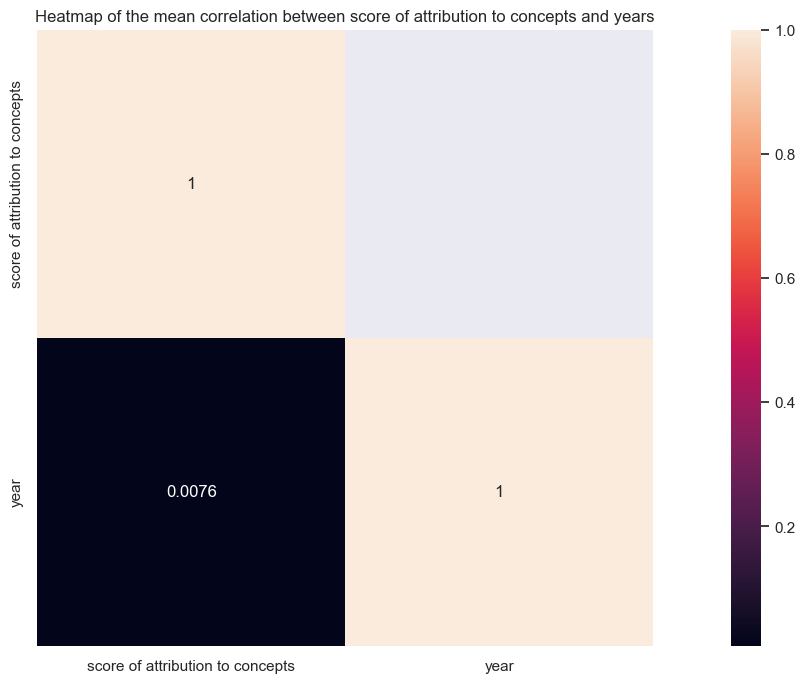

In [109]:
sns.set(rc={"figure.figsize": (20, 8)})
sns.heatmap(corr_df_lowtriangular, annot=True, square=True).set(
title="Heatmap of the mean correlation between score of attribution to concepts and years",
xticklabels=['score of attribution to concepts','year'],
yticklabels=['score of attribution to concepts','year']
)
plt.show()

__Observation__

As expected, the variables ```year``` and ```score_concepts``` are not correlated. Nevertheless, this was a good exercise, to see how one can manipulate these computational tools. 